## Acknowledgments
This project was for the Hackathon at the end of the MIT Data Science and Machine Learning course offered by Great Learning (Sept '23 cohort). The dataset and the challenge structure were provided by this course. This hackathon served as a capstone to the intensive learning journey in the course, allowing the application of skills and techniques learned throughout.



# Problem Background and Statement

Goal:
The goal of the problem is to predict whether a passenger was satisfied or not considering his/her overall experience of travelling on the Shinkansen Bullet Train.

Dataset:

The problem consists of 2 separate datasets: Travel data & Survey data. Travel data has information related to passengers and attributes related to the Shinkansen train, in which they travelled. The survey data is aggregated data of surveys indicating the post-service experience. You are expected to treat both these datasets as raw data and perform any necessary data cleaning/validation steps as required.

The data has been split into two groups and provided in the Dataset folder. The folder contains both train and test data separately.

Train_Data
Test_Data

Target Variable: Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)

The training set can be used to build your machine-learning model. The training set has labels for the target column - Overall_Experience.

The testing set should be used to see how well your model performs on unseen data. For the test set, it is expected to predict the ‘Overall_Experience’ level for each participant.

Submission File Format: You will need to submit a CSV file with exactly 35,602 entries plus a header row. The file should have exactly two columns

## Data Dictionary:

Travel Data Dictionary:
- ID: Unique identifier for each passenger.
- Gender: Passenger's gender.
- Customer_Type: Indicates if the passenger is a loyal or disloyal customer.
- Age: Age of the passenger.
- Type_Travel: Purpose of the travel (Personal or Business).
- Travel_Class: Class of travel on the train (Business or Eco).
- Travel_Distance: Distance traveled by the passenger.
- Departure_Delay_in_Mins: Train departure delay in minutes.
- Arrival_Delay_in_Mins: Train arrival delay in minutes.

Survey Data Dictionary:
- ID: Unique identifier for each passenger (same as in Travel Data).
- Platform_Location: Passenger's convenience rating for the platform location.
- Seat_Class: Type of seat class in the train (Ordinary or Green Car).
- Overall_Experience: Passenger's overall satisfaction (1 for Satisfied, 0 for Not Satisfied).
- Seat_Comfort,
- Arrival_Time_Convenient,
- Catering,
- Onboard_Wifi_Service,
- Onboard_Entertainment,
- Online_Support,
- Ease_of_Online_Booking,
- Onboard_Service,
- Legroom,
- Baggage_Handling,
- CheckIn_Service,
- Cleanliness,
- Online_Boarding:

These fields represent passenger ratings on various aspects of their experience, ranging from 'Extremely Poor' to 'Excellent'.

# Uploading the libraries and datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [ ]:
# File paths
travel_data_train_path = 'Traveldata_train.csv'
survey_data_train_path = 'Surveydata_train.csv'
travel_data_test_path = 'Traveldata_test.csv'
survey_data_test_path = 'Surveydata_test.csv'

# Load the datasets
travel_data_train = pd.read_csv(travel_data_train_path)
survey_data_train = pd.read_csv(survey_data_train_path)
travel_data_test = pd.read_csv(travel_data_test_path)
survey_data_test = pd.read_csv(survey_data_test_path)

# Data Exploration and Cleaning

Exploring and verifying the data structures and types are critical to understanding the data that you're working with.

In [ ]:
# Quick look at the data structures
print(travel_data_train.head())
print(survey_data_train.head())
print(travel_data_test.head())
print(survey_data_test.head())

         ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0              NaN     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business Travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business Travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
0              272                      0.0                    5.0  
1             2200                      9.0                    0.0  
2             1061                     77.0                  119.0  
3              780                     13.0                   18.0  
4             1981                      0.0                    0.0  
         ID  Overall_Experience       Seat_Comfort Seat_Class  \
0  98800001                   0  Needs Improvement  Green Car   
1  98

In [ ]:
travel_data_test.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0


The data so far takes the expected shapes and structures as described in the data dictionary.

In [ ]:
# Checking the shape of the different datasets

# Print the shapes of all four datasets
print("Travel Data Train Shape:", travel_data_train.shape)
print("Survey Data Train Shape:", survey_data_train.shape)
print("Travel Data Test Shape:", travel_data_test.shape)
print("Survey Data Test Shape:", survey_data_test.shape)

Travel Data Train Shape: (94379, 9)
Survey Data Train Shape: (94379, 17)
Travel Data Test Shape: (35602, 9)
Survey Data Test Shape: (35602, 16)


These are the same shapes, except that the survey data test dataset is missing a column, which we would expect as it does not contain the target variable of "Satisfied with trip".

In [ ]:
# Looking for duplicates

# Identifying duplicate rows in the Travel Data Train dataset
duplicates_travel_train = travel_data_train.duplicated()
print("Number of duplicate rows in Travel Data Train:", duplicates_travel_train.sum())

# Identifying duplicate rows in the Survey Data Train dataset
duplicates_survey_train = survey_data_train.duplicated()
print("Number of duplicate rows in Survey Data Train:", duplicates_survey_train.sum())

# Identifying duplicate rows in the Travel Data Test dataset
duplicates_travel_test = travel_data_test.duplicated()
print("Number of duplicate rows in Travel Data Test:", duplicates_travel_test.sum())

# Identifying duplicate rows in the Survey Data Test dataset
duplicates_survey_test = survey_data_test.duplicated()
print("Number of duplicate rows in Survey Data Test:", duplicates_survey_test.sum())

# Dropping duplicates if need be:
# travel_data_train = travel_data_train.drop_duplicates()
# survey_data_train = survey_data_train.drop_duplicates()
# travel_data_test = travel_data_test.drop_duplicates()
# survey_data_test = survey_data_test.drop_duplicates()


Number of duplicate rows in Travel Data Train: 0
Number of duplicate rows in Survey Data Train: 0
Number of duplicate rows in Travel Data Test: 0
Number of duplicate rows in Survey Data Test: 0


No duplicate rows found in any of the datasets.  Moving on to further exploration of the travel_data_train set.

## Exploring travel_data_train

In [ ]:
travel_data_train.head()


,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
94374,98894375,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0
94375,98894376,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0
94376,98894377,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0
94378,98894379,Male,Loyal Customer,54.0,NaN,Eco,2107,28.0,28.0


In [ ]:
travel_data_train.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
94374,98894375,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0
94375,98894376,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0
94376,98894377,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0
94378,98894379,Male,Loyal Customer,54.0,NaN,Eco,2107,28.0,28.0


This data set contains ID, Gender, Customer_Type, Age (as a float), Type_Travel (business or personal), Travel_Class (Business or Eco), Travel_Distance, Departure_Delay_in_Mins, and Arrival_Delay_in_Mins. This is all as described in the data dictionary.

In [ ]:
travel_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


94,739 entries total, of which it looks like ID, Travel_Class, and Travel_Distance are complete with no nulls.  The other columns (Gender, Customer_Type, Age, Type_Travel, Departure_Delay_in_Mins, and Arrival_Delay_in_Mins) all have null values.  We will handle those after examing the data set further.  Gender, Customer_Type, Type_Travel, and Travel_Class are all object data types with 2 categories a piece.

In [ ]:
travel_data_train.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,1.464709e+01,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,1.500522e+01,38.439409,0.0,0.0,0.0,13.0,1584.0


This shows the basic statistics of the numerical categories.  'Age' ranges from 7 to 85 and looks roughly normally distributed, with the mean and median being very close.  Travel Distance ranges from 50 to 6951 and shows a definite left-skew, though not an extreme one, and the mean and median are fairly close.  The arrival and departure delays are highly left skewed, with most entries being 0 (even the median is 0), but with maxes close to 1600.

In [ ]:
travel_data_train.describe(include=[object]).T

,count,unique,top,freq
Gender,94302,2,Female,47815
Customer_Type,85428,2,Loyal Customer,69823
Type_Travel,85153,2,Business Travel,58617
Travel_Class,94379,2,Eco,49342


All the categorical variables have 2 categories each.  Male and Female are roughly evenly distributed, as is Travel_Class, but Customer_Type and Travel_Class definitely have more 'Loyal Customers' and 'Business Travel' types respectively.

In [ ]:
# Checking for bad data and non-numerical characters in the numerical columns

# Assuming travel_data_test is your DataFrame
columns_to_check = travel_data_train.select_dtypes(include=['float64', 'int64']).columns

# Regular expression for non-numerical characters
regex_pattern = '[^\d.-]'

for column in columns_to_check:
    # Find rows with non-numerical data ignoring NaN values
    non_numerical_rows = travel_data_test[column].dropna().astype(str).str.contains(regex_pattern, regex=True)

    # Get indices of these rows
    non_numerical_indices = non_numerical_rows[non_numerical_rows].index

    if not non_numerical_indices.empty:
        print(f"Column '{column}' has {len(non_numerical_indices)} rows with non-numerical data.")
        print(f"Indices of these rows: {list(non_numerical_indices)}")

    else:
        print(f"No non-numerical data found in '{column}'.")


No non-numerical data found in 'ID'.
No non-numerical data found in 'Age'.
No non-numerical data found in 'Travel_Distance'.
No non-numerical data found in 'Departure_Delay_in_Mins'.
No non-numerical data found in 'Arrival_Delay_in_Mins'.


Summary of Data Preparation Steps:
'ID': This is a unique identifier and will not be used in the model training process. However, it's essential to keep it in the test set for the final submission, and I want to keep it in the train set for now because I will use it to join with the survey data.

'Gender': As there are only 77 missing values out of about 94,000, I will impute the missing values with the mode (most frequent value) of this column. After handling the missing values, I will convert the datatype to 'category' and apply one-hot encoding.

'Customer_Type' and 'Type_Travel': Both columns have around 10% missing data. I will create an 'Unknown' category for the missing values to capture the potential informativeness of the missingness. Then, I will convert these to 'category' datatypes and apply one-hot encoding.

'Age': The missing values in this column will be imputed using the median age. Though the data type is float, it's not necessary to convert it to integers as the floats seem to be whole numbers, and the conversion won't significantly impact the model's performance.

'Travel_Class': I will convert this column to a 'category' datatype and apply one-hot encoding.

'Travel_Distance': No specific handling is required for this column as there are no missing values.

'Departure_Delay_in_Mins' and 'Arrival_Delay_in_Mins': I will handle the missing values by imputing them with the median due to the columns' highly left-skewed distribution. I will also apply a logarithmic transformation to these columns to reduce skewness.

Before taking these steps, I will examine the travel_data_test dataset to see if these changes make sense given that data as well, then apply all transformations to both.

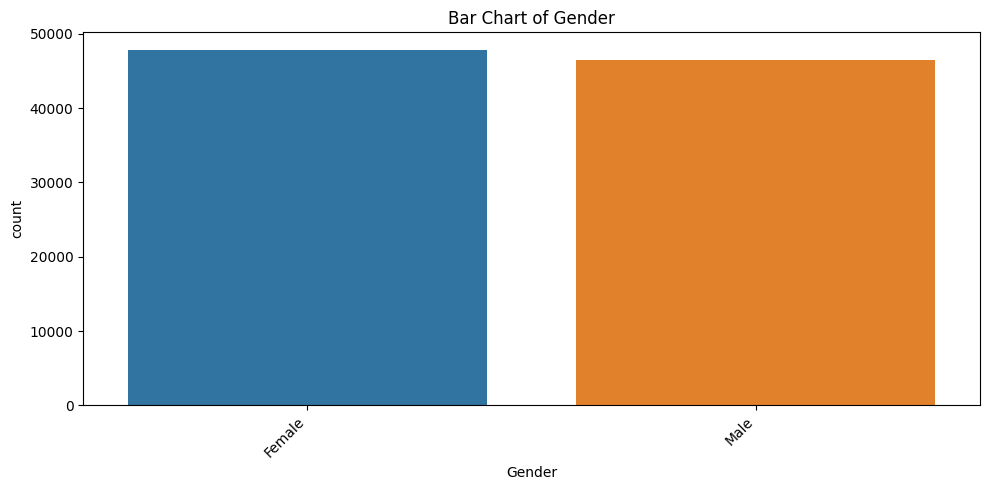

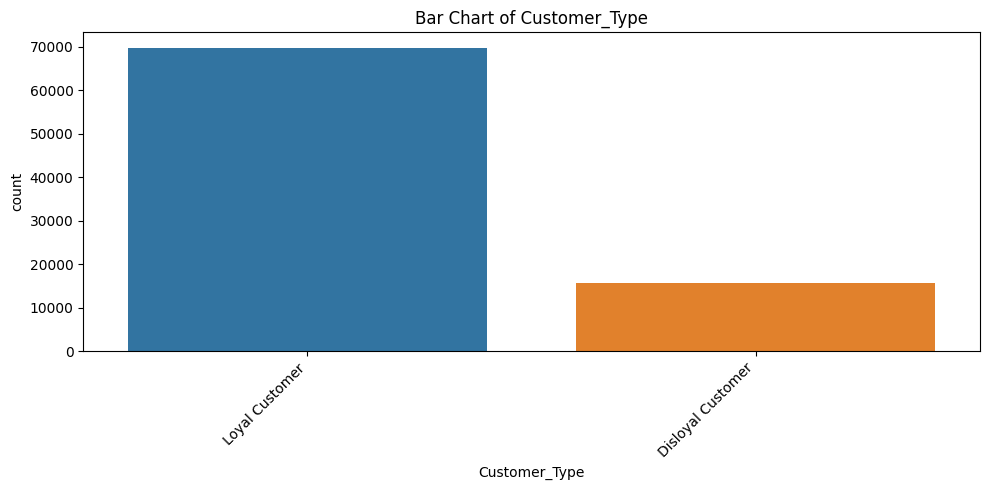

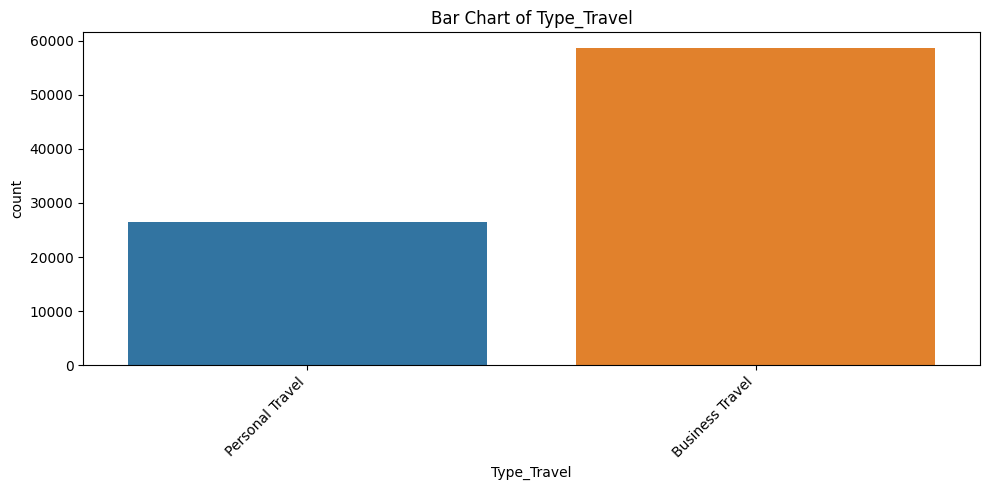

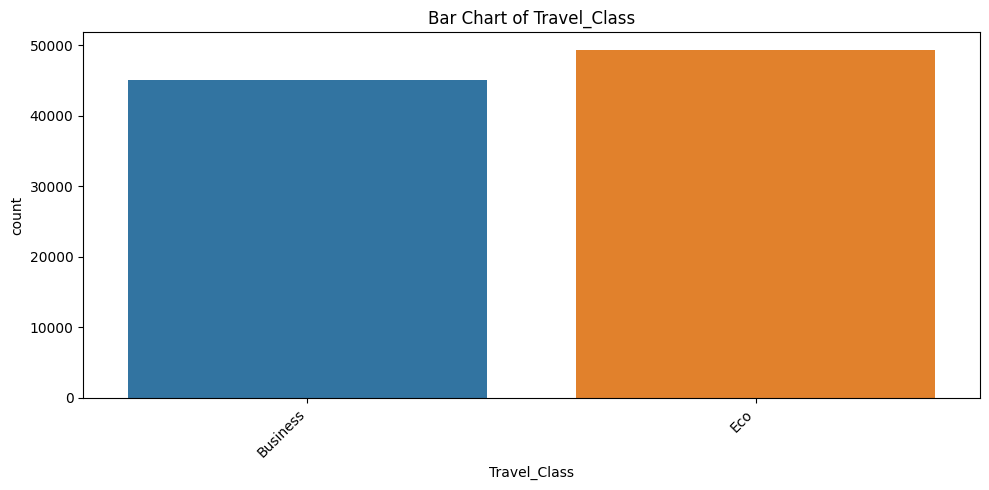

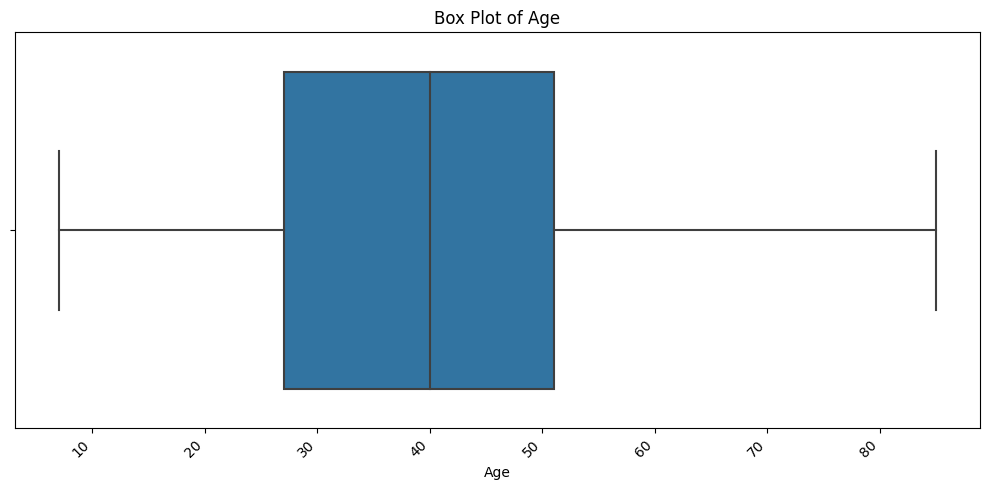

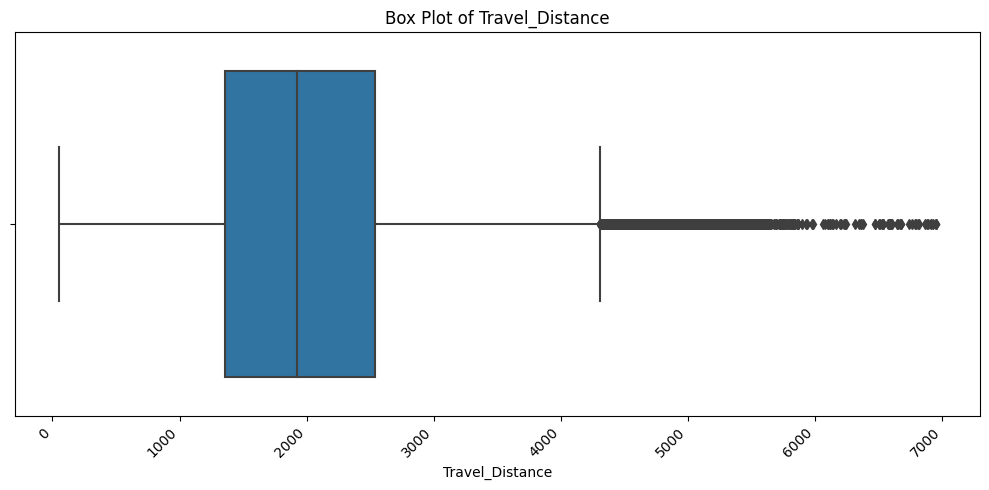

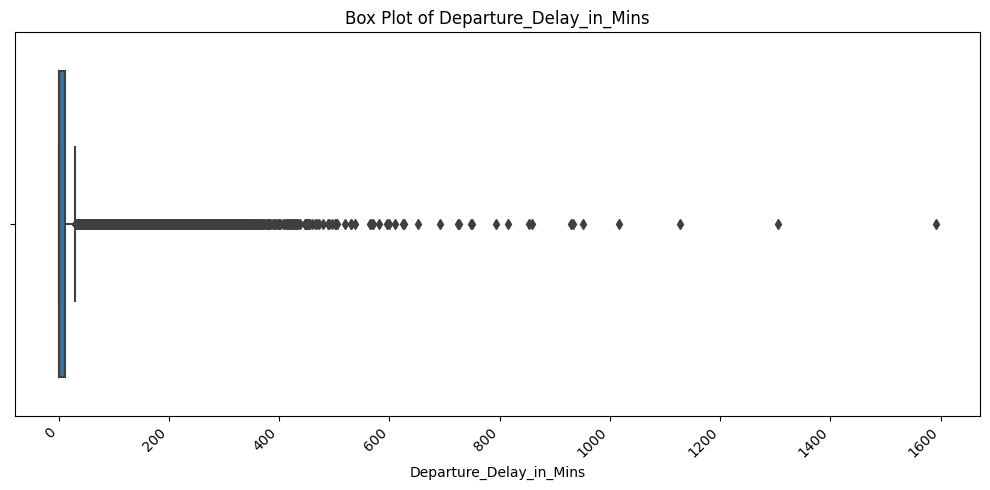

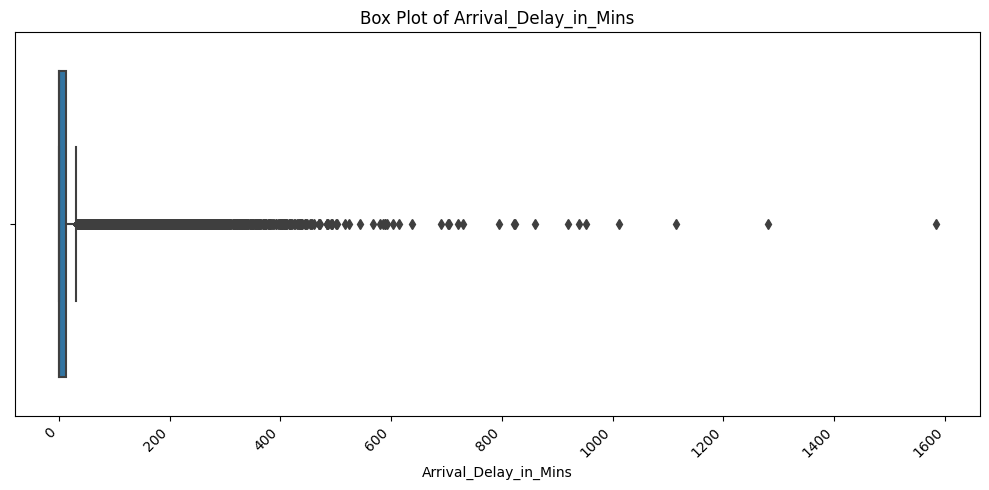

In [ ]:
# Let's see what distributions we have here to determine if there are any variables that are not helpful

# Filter out the "ID" column from the DataFrame
object_columns = ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class']
numerical_columns = ['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']

# Create bar charts for object columns
for column in object_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=travel_data_train)
    plt.title(f'Bar Chart of {column}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()  # Adjust the layout to ensure labels are not cut off
    plt.show()

# Create box plots for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=column, data=travel_data_train)
    plt.title(f'Box Plot of {column}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()  # Adjust the layout to ensure labels are not cut off
    plt.show()


This shows that the delay columns are extremely left-skewed, and the travel distance is significantly left-skewed, with many outliers to the right.  Age is very normally distributed, and gender is very evenly split.  The majority of travelers are "Loyal Customers".  The majority of travelers are doing so for Business rather than Personal, but Travel_Class is pretty evenly split between Business and Economy, suggesting that many business travelers are using Economy class.

We'll have to treat the outlier variables carefully, and both put them on a log scale and then scale them further.

## Exploring travel_data_test

In [ ]:
travel_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.4+ MB


In [ ]:
travel_data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,35602.0,9.991780e+07,10277.556478,99900001.0,99908901.25,99917801.5,99926701.75,99935602.0
Age,35591.0,3.944700e+01,15.137554,7.0,27.00,40.0,51.00,85.0
Travel_Distance,35602.0,1.987152e+03,1024.308863,50.0,1360.00,1929.0,2559.00,6868.0
Departure_Delay_in_Mins,35573.0,1.488070e+01,37.895453,0.0,0.00,0.0,13.00,978.0
Arrival_Delay_in_Mins,35479.0,1.530880e+01,38.531293,0.0,0.00,0.0,13.00,970.0


In [ ]:
travel_data_test.describe(include=[object]).T

,count,unique,top,freq
Gender,35572,2,Female,18069
Customer_Type,32219,2,Loyal Customer,26349
Type_Travel,32154,2,Business Travel,22313
Travel_Class,35602,2,Eco,18473


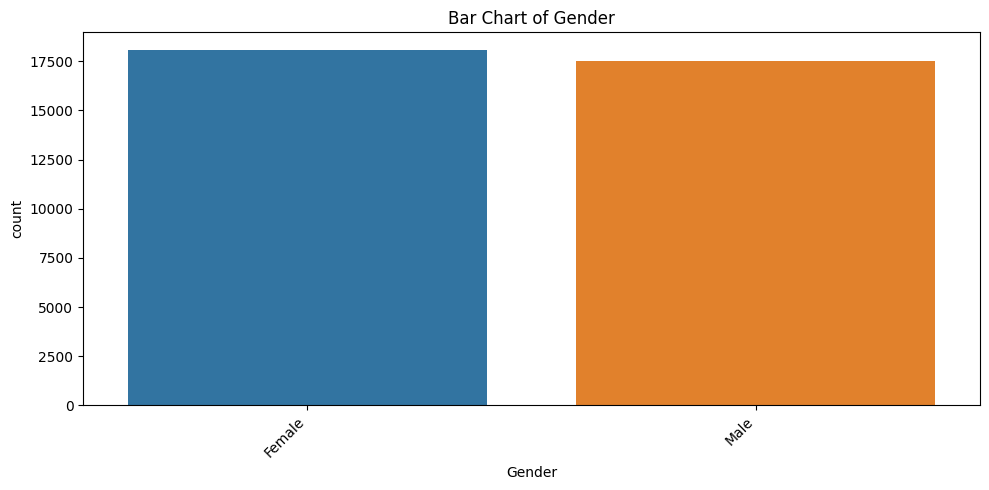

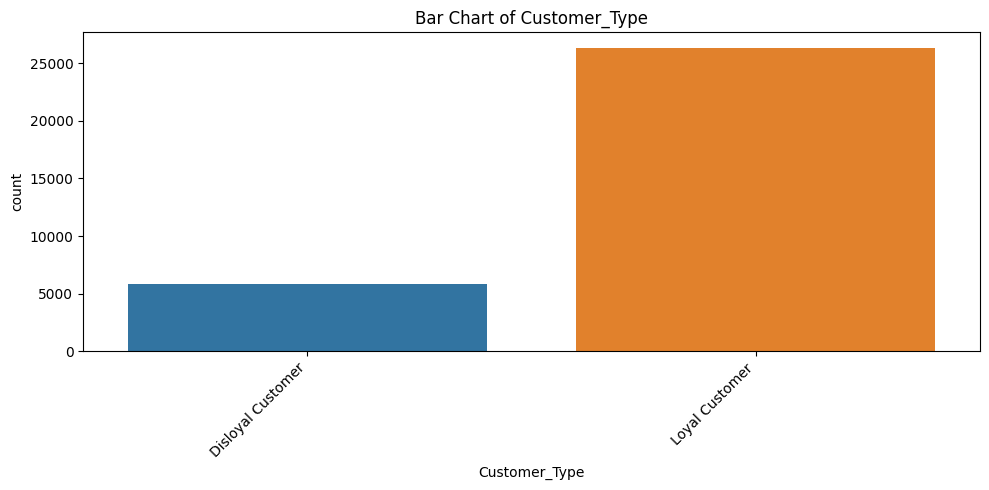

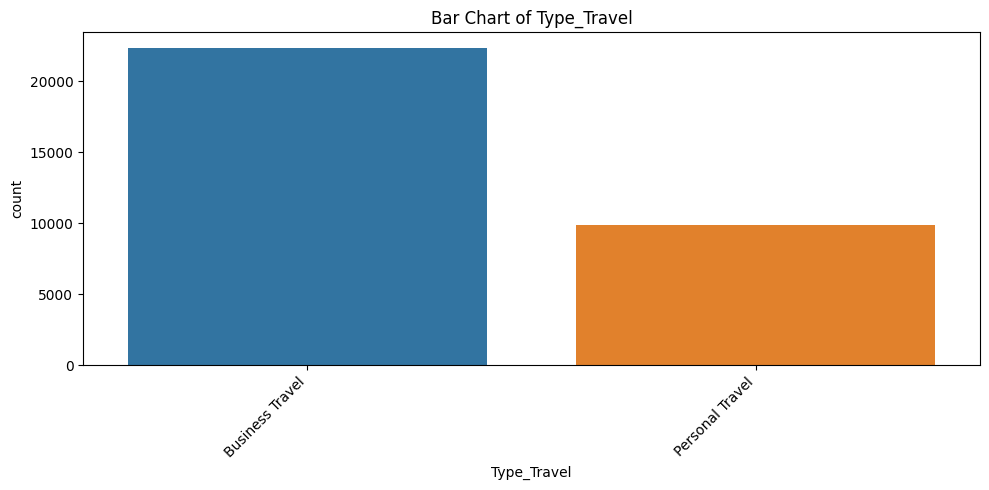

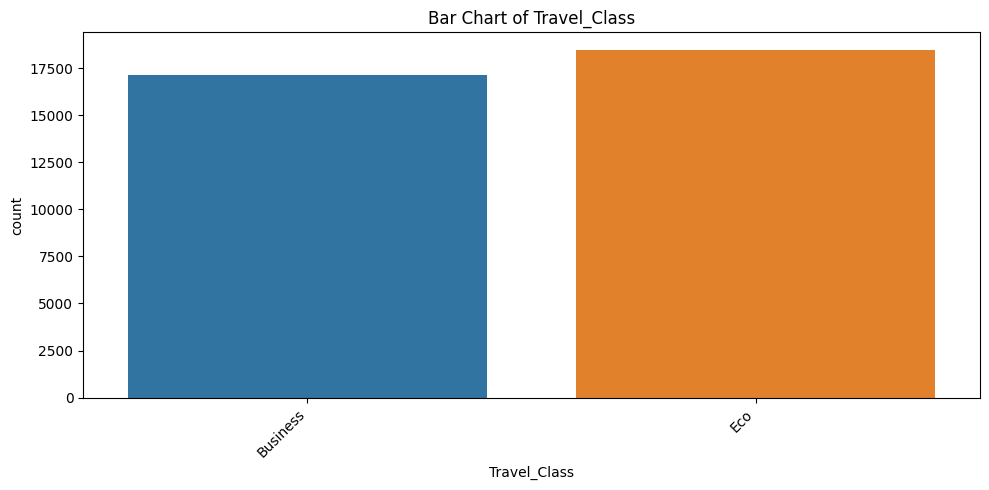

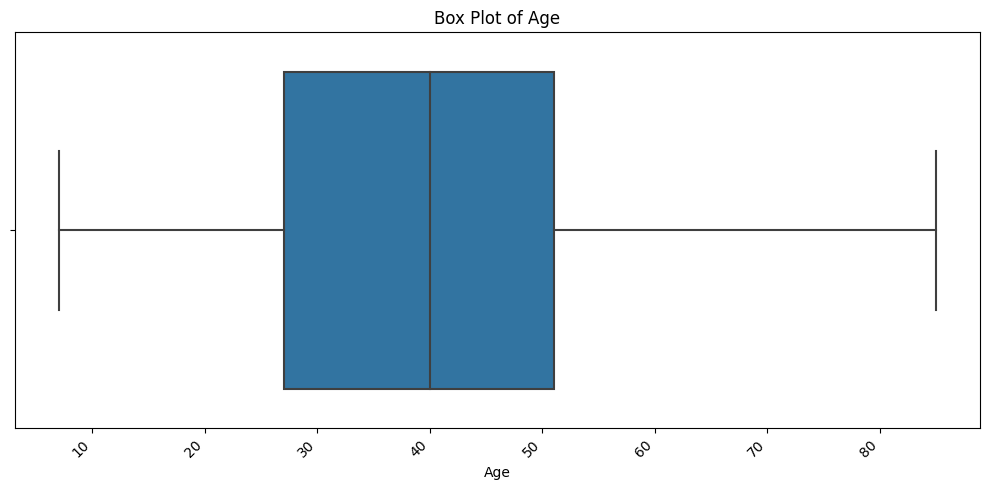

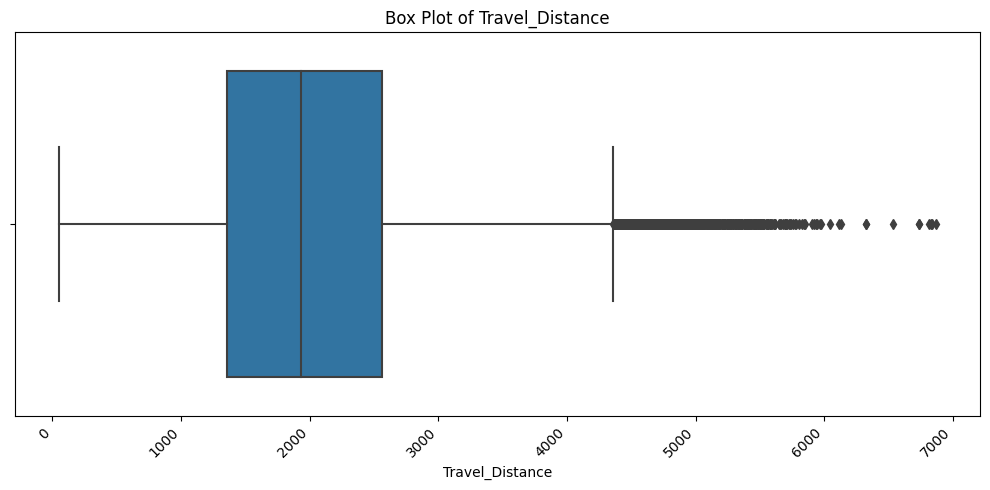

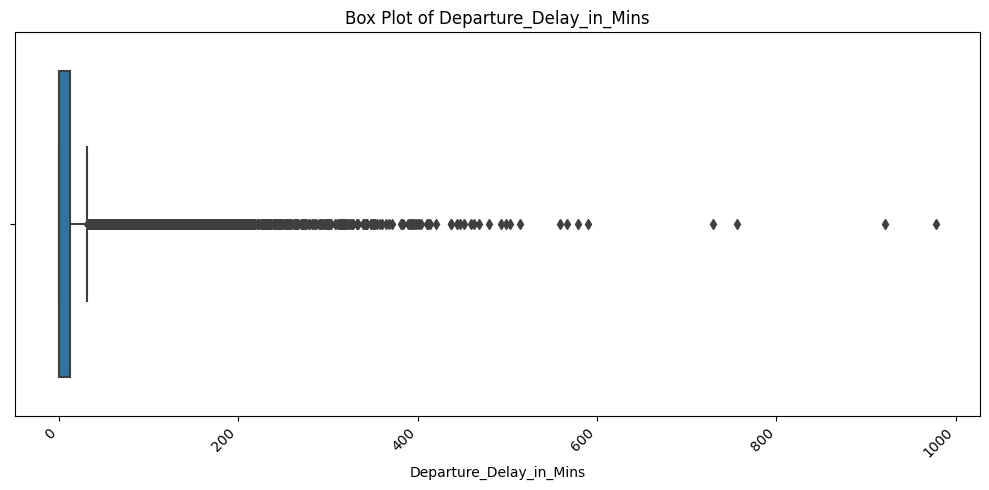

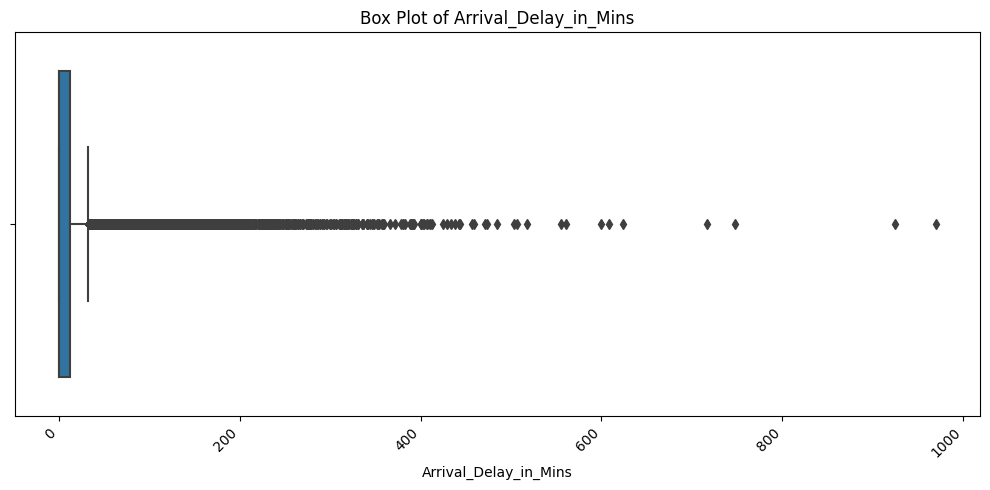

In [ ]:
# Filter out the "ID" column from the DataFrame
object_columns = ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class']
numerical_columns = ['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']

# Create bar charts for object columns
for column in object_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=travel_data_test)
    plt.title(f'Bar Chart of {column}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()  # Adjust the layout to ensure labels are not cut off
    plt.show()

# Create box plots for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=column, data=travel_data_test)
    plt.title(f'Box Plot of {column}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()  # Adjust the layout to ensure labels are not cut off
    plt.show()

The distributions between travel_data_train and travel_data_test appear to be very similar, which is a good sign that they've been sampled appropriately.

After examining the travel_data_test dataset, it looks the labels, datatypes, and distributions are quite similar to the travel_data_train dataset, with the exception that it looks like there are fewer missing values in this set.  I can make all the same changes that I made to the other dataset, except I will not drop the ID column as I need that for the final prediction.

In [ ]:
# Checking for bad data and non-numerical characters in the numerical columns

# Assigning columns
columns_to_check = travel_data_test.select_dtypes(include=['float64', 'int64']).columns

# Regular expression for non-numerical characters
regex_pattern = '[^\d.-]'

for column in columns_to_check:
    # Find rows with non-numerical data ignoring NaN values
    non_numerical_rows = travel_data_test[column].dropna().astype(str).str.contains(regex_pattern, regex=True)

    # Get indices of these rows
    non_numerical_indices = non_numerical_rows[non_numerical_rows].index

    if not non_numerical_indices.empty:
        print(f"Column '{column}' has {len(non_numerical_indices)} rows with non-numerical data.")
        print(f"Indices of these rows: {list(non_numerical_indices)}")

    else:
        print(f"No non-numerical data found in '{column}'.")



No non-numerical data found in 'ID'.
No non-numerical data found in 'Age'.
No non-numerical data found in 'Travel_Distance'.
No non-numerical data found in 'Departure_Delay_in_Mins'.
No non-numerical data found in 'Arrival_Delay_in_Mins'.


No non-numerical data or duplicate data was found in either of the travel_data datasets, so I will proceed with applying the outlined steps for handling null values and other changes to the columns.

### Cleaning the travel data sets

I start by reloading to decrease the number of cells that I have to run when restarting or developing another model.

In [ ]:
# Reload the dataset
travel_data_train = pd.read_csv(travel_data_train_path)

# Make a copy of the dataset
df_travel_train = travel_data_train.copy()

# Impute missing values for 'Gender' with mode
gender_mode = df_travel_train['Gender'].mode()[0]
df_travel_train['Gender'].fillna(gender_mode, inplace=True)

# Create 'Unknown' category for missing values in 'Customer_Type' and 'Type_Travel'
for column in ['Customer_Type', 'Type_Travel']:
    df_travel_train[column].fillna('Unknown', inplace=True)

# Impute missing values for 'Age' with median
age_median = df_travel_train['Age'].median()
df_travel_train['Age'].fillna(age_median, inplace=True)

# Convert 'Gender', 'Customer_Type', 'Type_Travel', and 'Travel_Class' to 'category'
for column in ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class']:
    df_travel_train[column] = df_travel_train[column].astype('category')

# Impute missing values for 'Departure_Delay_in_Mins' and 'Arrival_Delay_in_Mins' with median
for column in ['Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']:
    median_value = df_travel_train[column].median()
    df_travel_train[column].fillna(median_value, inplace=True)

# Apply logarithmic transformation to 'Departure_Delay_in_Mins' and 'Arrival_Delay_in_Mins'
for column in ['Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']:
    df_travel_train[column] = np.log1p(df_travel_train[column])

# One-hot encoding for categorical variables, dropping the first column
df_travel_train = pd.get_dummies(df_travel_train, columns=['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class'], drop_first=True)

df_travel_train.head()



,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_Unknown,Type_Travel_Personal Travel,Type_Travel_Unknown,Travel_Class_Eco
0,98800001,52.0,272,0.000000,1.791759,0,1,0,0,1,0
1,98800002,48.0,2200,2.302585,0.000000,1,1,0,1,0,1
2,98800003,43.0,1061,4.356709,4.787492,0,1,0,0,0,0
3,98800004,44.0,780,2.639057,2.944439,0,1,0,0,0,0
4,98800005,50.0,1981,0.000000,0.000000,0,1,0,0,0,0


In [ ]:
# Making the same changes to the travel_data_test set

# Reload the dataset
travel_data_test = pd.read_csv(travel_data_test_path)

# Make a copy of the dataset
df_travel_test = travel_data_test.copy()

# Impute missing values for 'Gender' with mode
gender_mode = df_travel_test['Gender'].mode()[0]
df_travel_test['Gender'].fillna(gender_mode, inplace=True)

# Create 'Unknown' category for missing values in 'Customer_Type' and 'Type_Travel'
for column in ['Customer_Type', 'Type_Travel']:
    df_travel_test[column].fillna('Unknown', inplace=True)

# Impute missing values for 'Age' with median
age_median = df_travel_test['Age'].median()
df_travel_test['Age'].fillna(age_median, inplace=True)

# Convert 'Gender', 'Customer_Type', 'Type_Travel', and 'Travel_Class' to 'category'
for column in ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class']:
    df_travel_test[column] = df_travel_test[column].astype('category')

# Impute missing values for 'Departure_Delay_in_Mins' and 'Arrival_Delay_in_Mins' with median
for column in ['Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']:
    median_value = df_travel_test[column].median()
    df_travel_test[column].fillna(median_value, inplace=True)

# Apply logarithmic transformation to 'Departure_Delay_in_Mins' and 'Arrival_Delay_in_Mins'
for column in ['Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']:
    df_travel_test[column] = np.log1p(df_travel_test[column])

# One-hot encoding for categorical variables, dropping the first column
df_travel_test = pd.get_dummies(df_travel_test, columns=['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class'], drop_first=True)

df_travel_test.head()


,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_Unknown,Type_Travel_Personal Travel,Type_Travel_Unknown,Travel_Class_Eco
0,99900001,36.0,532,0.000000,0.000000,0,0,1,0,0,0
1,99900002,21.0,1425,2.302585,3.367296,0,0,0,0,0,0
2,99900003,60.0,2832,0.000000,0.000000,1,1,0,0,0,0
3,99900004,29.0,1352,0.000000,0.000000,0,1,0,1,0,1
4,99900005,18.0,1610,2.890372,0.000000,1,0,0,0,0,0


Now I have the new datasets with these transformations applied.  I dropped columns because my first model will use logistic regression and I want to avoid multi-collinearity.  I will make one other feature engineering change of combining the departure delay and arrival delay data (using the original, non-logarithmic data) to express the Total_Delay.  I will also scale all three of the Delay-related columns.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Calculate Total_Delay
df_travel_train['Total_Delay_Log'] = np.log1p(travel_data_train['Departure_Delay_in_Mins'] + travel_data_train['Arrival_Delay_in_Mins'])
df_travel_test['Total_Delay_Log'] = np.log1p(travel_data_test['Departure_Delay_in_Mins'] + travel_data_test['Arrival_Delay_in_Mins'])

# Rename columns
df_travel_train.rename(columns={'Departure_Delay_in_Mins': 'Departure_Delay_Log',
                                'Arrival_Delay_in_Mins': 'Arrival_Delay_Log'}, inplace=True)
df_travel_test.rename(columns={'Departure_Delay_in_Mins': 'Departure_Delay_Log',
                               'Arrival_Delay_in_Mins': 'Arrival_Delay_Log'}, inplace=True)

# For now, I'm going to delay scaling until Logistic Regression,
# because I want it unscaled for the Decision Tree Model

# Initialize the scaler
# scaler = StandardScaler()

# Columns to scale
# delay_columns = ['Departure_Delay_Log', 'Arrival_Delay_Log', 'Total_Delay_Log', 'Travel_Distance']

# Apply scaling to the delay-related columns
#df_travel_train[delay_columns] = scaler.fit_transform(df_travel_train[delay_columns])
# df_travel_test[delay_columns] = scaler.transform(df_travel_test[delay_columns])

df_travel_train.head()


,ID,Age,Travel_Distance,Departure_Delay_Log,Arrival_Delay_Log,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_Unknown,Type_Travel_Personal Travel,Type_Travel_Unknown,Travel_Class_Eco,Total_Delay_Log
0,98800001,52.0,272,0.000000,1.791759,0,1,0,0,1,0,1.791759
1,98800002,48.0,2200,2.302585,0.000000,1,1,0,1,0,1,2.302585
2,98800003,43.0,1061,4.356709,4.787492,0,1,0,0,0,0,5.283204
3,98800004,44.0,780,2.639057,2.944439,0,1,0,0,0,0,3.465736
4,98800005,50.0,1981,0.000000,0.000000,0,1,0,0,0,0,0.000000


I will consider other feature engineering options later.  For now, let's proceed to examine the survey data.

## Exploring survey_data_train

In [ ]:
survey_data_train.head()


,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
survey_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

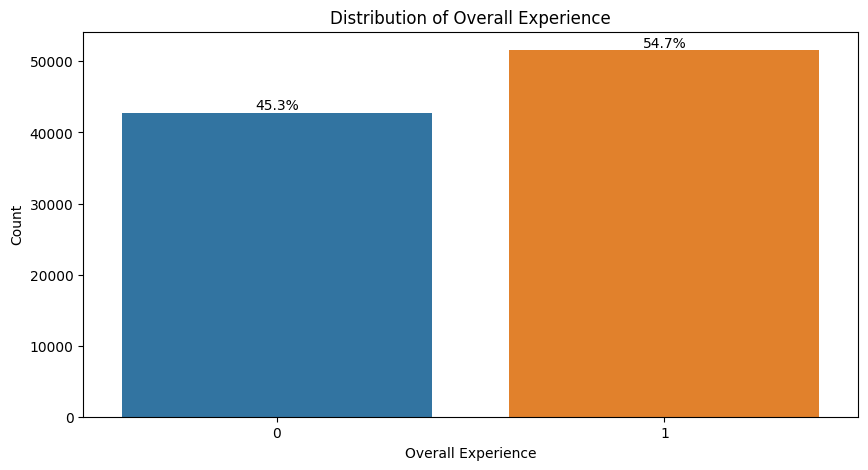

In [ ]:
# Plotting the distribution of Overall_Experience
plt.figure(figsize=(10, 5))
sns.countplot(x='Overall_Experience', data=survey_data_train)
plt.title('Distribution of Overall Experience')
plt.xlabel('Overall Experience')
plt.ylabel('Count')

# Showing percentages
# Add annotations with percentages
total_count = len(survey_data_train)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total_count:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.show()

Interestingly, the dependent variable of interest, "Overall Experience", is pretty evenly split, with only 54.7% of riders rating their overall experience as "Satisfied".

In [ ]:
survey_data_train.describe(include=object).T

,count,unique,top,freq
Seat_Comfort,94318,6,Acceptable,21158
Seat_Class,94379,2,Green Car,47435
Arrival_Time_Convenient,85449,6,Good,19574
Catering,85638,6,Acceptable,18468
Platform_Location,94349,6,Manageable,24173
Onboard_Wifi_Service,94349,6,Good,22835
Onboard_Entertainment,94361,6,Good,30446
Online_Support,94288,6,Good,30016
Ease_of_Online_Booking,94306,6,Good,28909
Onboard_Service,86778,6,Good,27265


In [ ]:
null_percentage = round(survey_data_train.isnull().mean() * 100, 1)
print(null_percentage)

ID                         0.0
Overall_Experience         0.0
Seat_Comfort               0.1
Seat_Class                 0.0
Arrival_Time_Convenient    9.5
Catering                   9.3
Platform_Location          0.0
Onboard_Wifi_Service       0.0
Onboard_Entertainment      0.0
Online_Support             0.1
Ease_of_Online_Booking     0.1
Onboard_Service            8.1
Legroom                    0.1
Baggage_Handling           0.2
CheckIn_Service            0.1
Cleanliness                0.0
Online_Boarding            0.0
dtype: float64


We've previously determined that there are no duplicate values in this dataset.  Obviously, there are missing values in some columns, with some of them representing a very small percentage (0.1-0.2%) and three columns with larger percentages missing (8.1-9.5%).  These are Arrival_Time_Convenient, Catering, and Onboard_Service.  The missing values in Catering and Onboard_Service might be due to riders not using those services during the trip, but it's not clear why a rider would not have selected an answer for Arrival_Time_Convenient.

Initially, I will plan to convert all of these from the 'object' to the 'category' datatype, impute the most common value for the missing values in the columns missing 0.1% or 0.2% of observations, and create a new option, "Unknown" for the columns with 8-9% missing values, since this missingness might be important.

I will also need to apply Label Encoding to all the categorical variables.

Before I do that, I will examine the distributions of these columns to determine if I can remove any of them from consideration, and then examine survey_data_test to determine that these changes still make sense for that data set.

In [ ]:
# Checking for bad data and non-numerical characters in the numerical columns

# Assuming travel_data_test is your DataFrame
columns_to_check = survey_data_train.select_dtypes(include=['float64', 'int64']).columns

# Regular expression for non-numerical characters
regex_pattern = '[^\d.-]'

for column in columns_to_check:
    # Find rows with non-numerical data ignoring NaN values
    non_numerical_rows = survey_data_train[column].dropna().astype(str).str.contains(regex_pattern, regex=True)

    # Get indices of these rows
    non_numerical_indices = non_numerical_rows[non_numerical_rows].index

    if not non_numerical_indices.empty:
        print(f"Column '{column}' has {len(non_numerical_indices)} rows with non-numerical data.")
        print(f"Indices of these rows: {list(non_numerical_indices)}")

    else:
        print(f"No non-numerical data found in '{column}'.")

No non-numerical data found in 'ID'.
No non-numerical data found in 'Overall_Experience'.


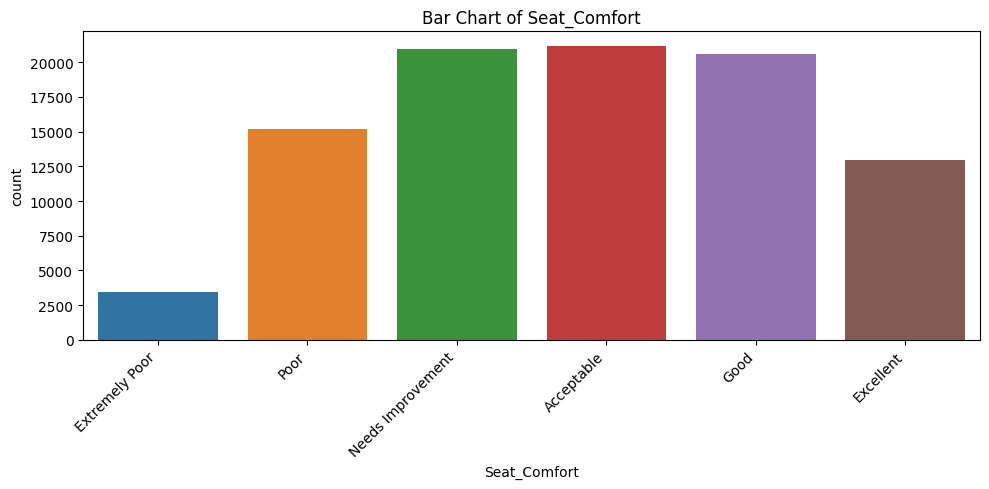

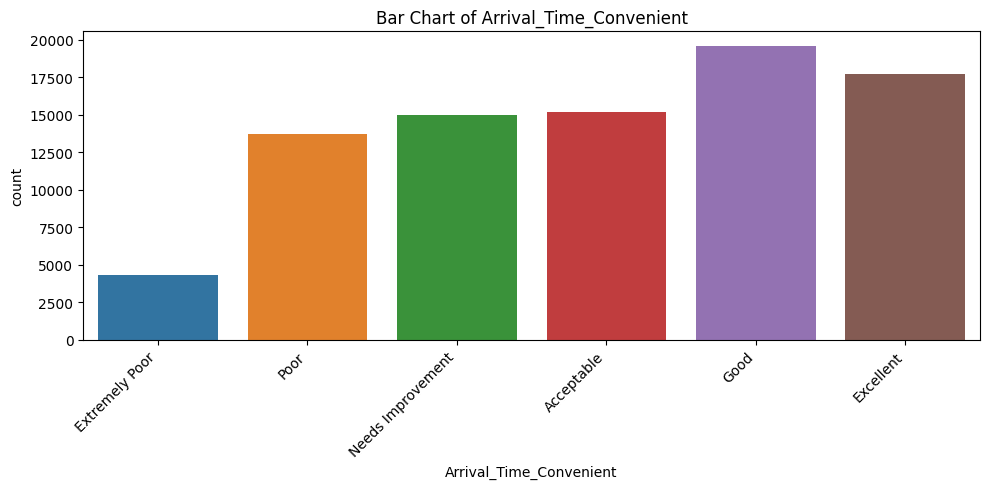

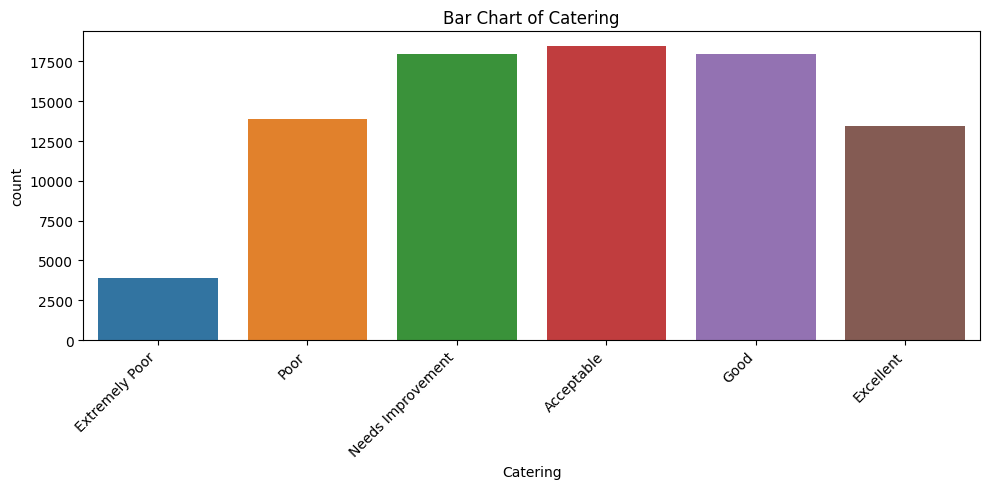

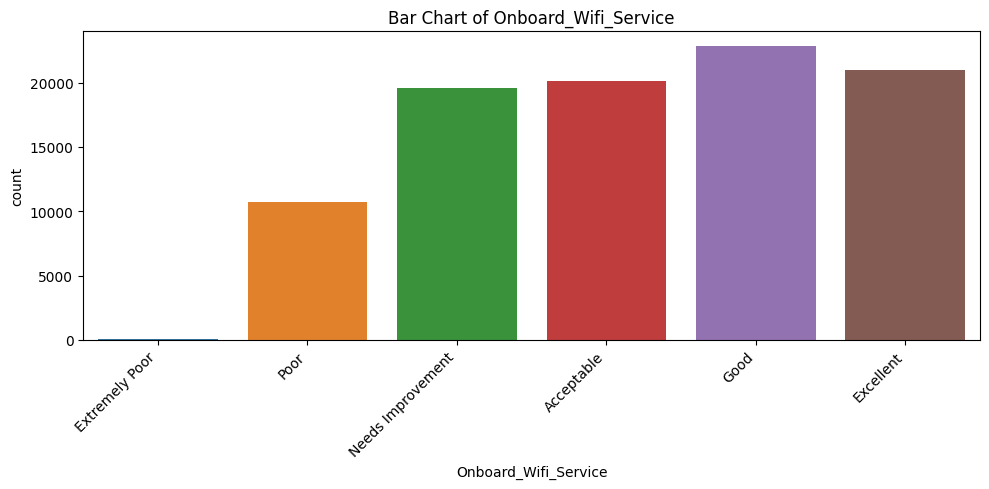

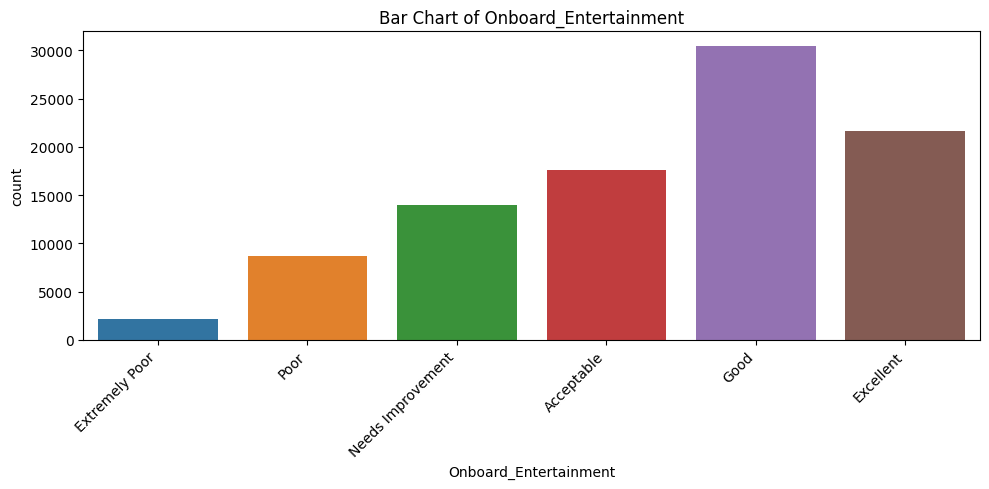

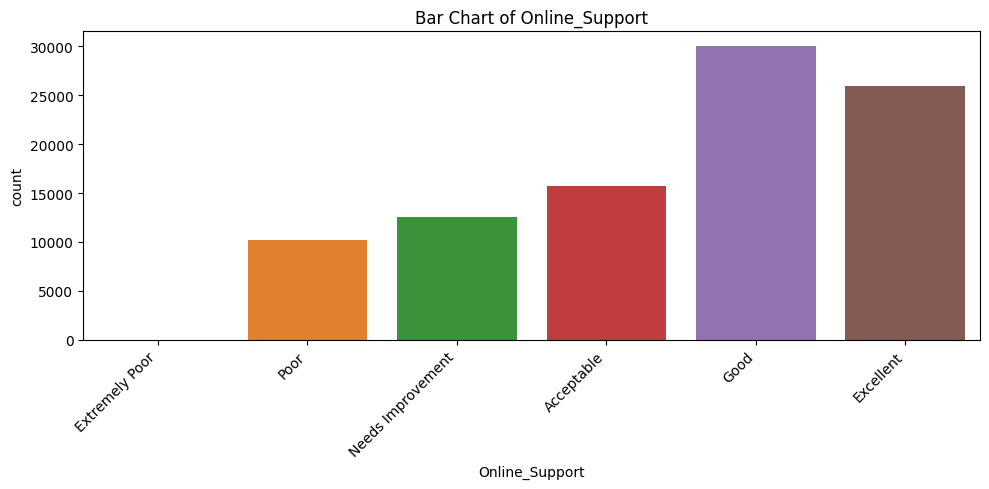

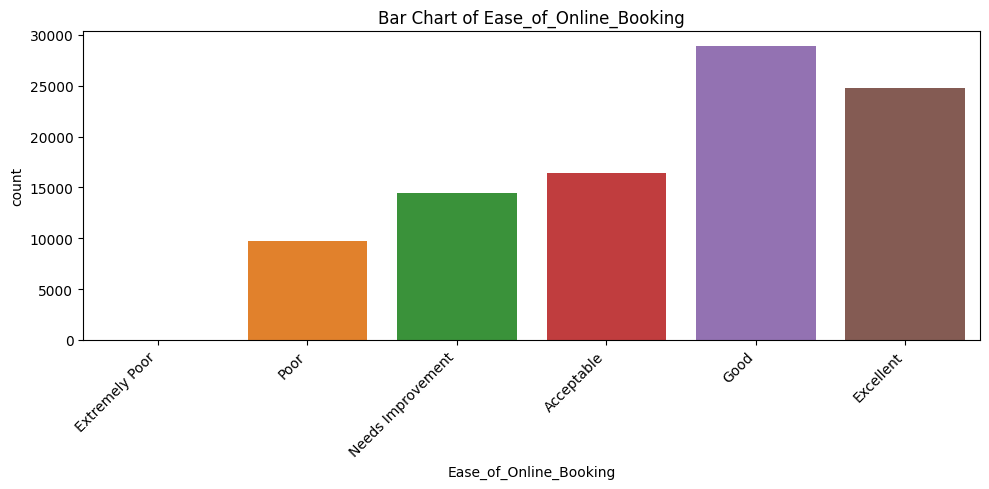

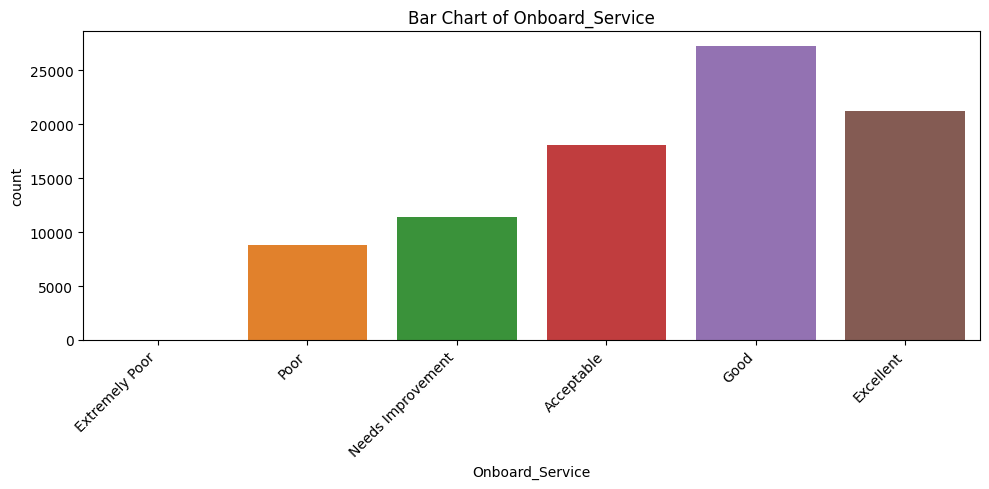

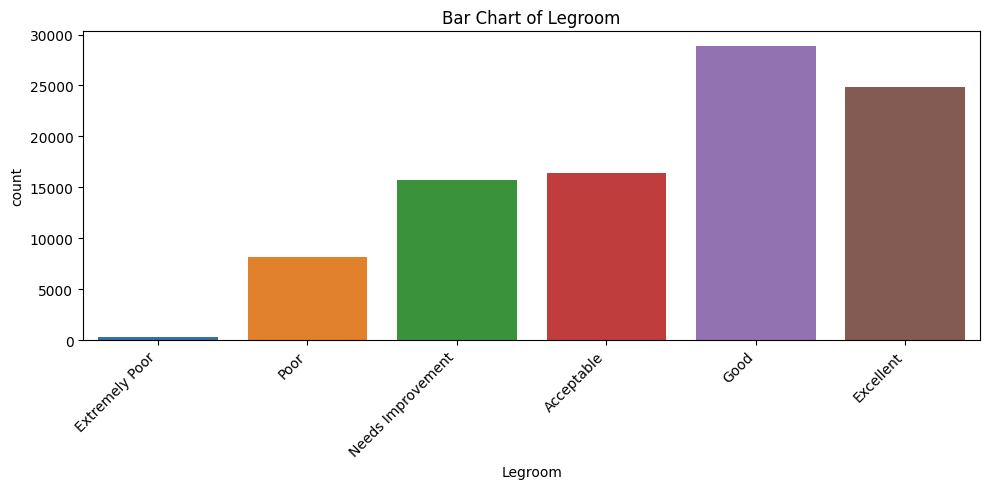

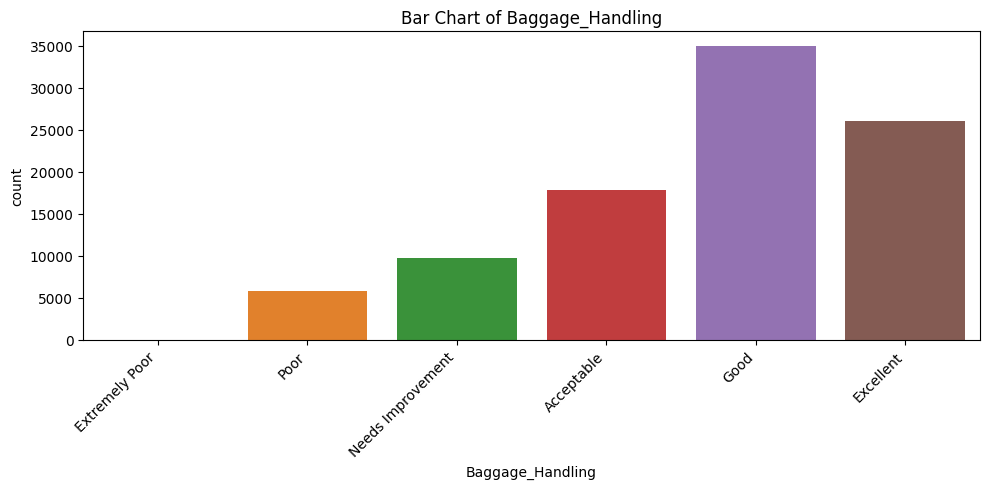

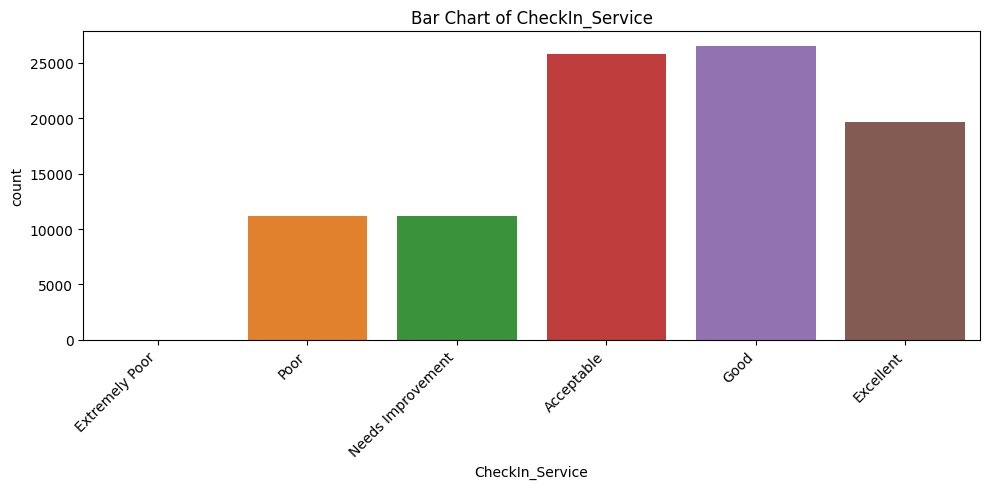

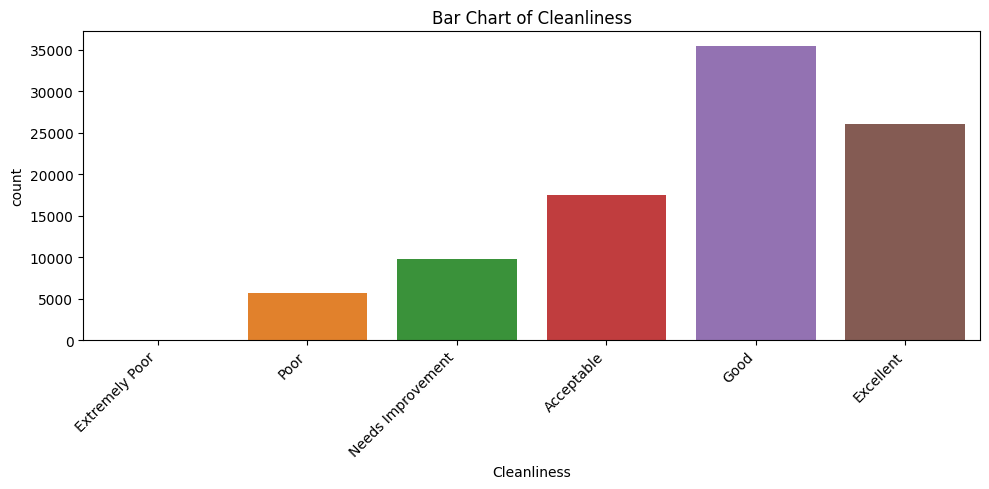

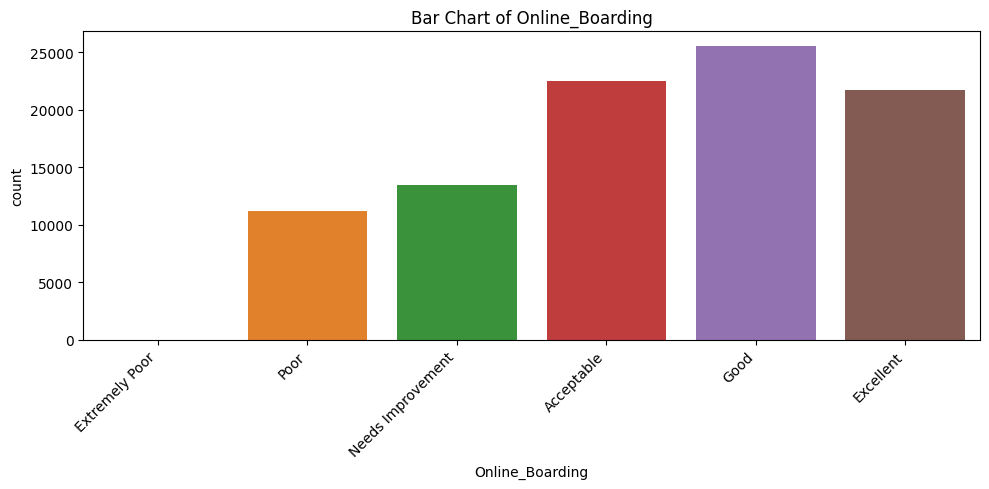

In [ ]:
# Creating charts for each of the categorical variables

# List of columns for which to create bar charts
columns_to_plot = [
    'Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Onboard_Wifi_Service',
    'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
    'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding'
]

# Define the desired order for all columns
category_orders = {
    column: ['Extremely Poor', 'Poor', 'Needs Improvement', 'Acceptable', 'Good', 'Excellent']
    for column in columns_to_plot
}

# Block of code that creates a bar chart for each categorical column with the specified order
for column in columns_to_plot:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=survey_data_train, order=category_orders[column])
    plt.title(f'Bar Chart of {column}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()  # Adjust the layout to ensure labels are not cut off
    plt.show()


Interestingly, the distributions for each of the categorical variables are not wildly different, with the biggest differences between charts being the number of "Extremely Poor" and "Good" ratings, with some categories having a relatively large number of "Extremely Poor" ratings and many having none, while the "Good" ratings vary significantly among some of the columns.

Fortunately, this means that all of these variables appear to provide valuable information.  Unfortunately, this means I don't have any variables I can drop from the analysis.  After I apply label encoding, there will be a very large number of dimensions, which will complicate analysis.

## Exploring survey_data_test

In [ ]:
survey_data_test.head()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [ ]:
survey_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       35602 non-null  int64 
 1   Seat_Comfort             35580 non-null  object
 2   Seat_Class               35602 non-null  object
 3   Arrival_Time_Convenient  32277 non-null  object
 4   Catering                 32245 non-null  object
 5   Platform_Location        35590 non-null  object
 6   Onboard_Wifi_Service     35590 non-null  object
 7   Onboard_Entertainment    35594 non-null  object
 8   Online_Support           35576 non-null  object
 9   Ease_of_Online_Booking   35584 non-null  object
 10  Onboard_Service          32730 non-null  object
 11  Legroom                  35577 non-null  object
 12  Baggage_Handling         35562 non-null  object
 13  CheckIn_Service          35580 non-null  object
 14  Cleanliness              35600 non-nul

In [ ]:
null_percentage = round(survey_data_test.isnull().mean() * 100, 1)
print(null_percentage)

ID                         0.0
Seat_Comfort               0.1
Seat_Class                 0.0
Arrival_Time_Convenient    9.3
Catering                   9.4
Platform_Location          0.0
Onboard_Wifi_Service       0.0
Onboard_Entertainment      0.0
Online_Support             0.1
Ease_of_Online_Booking     0.1
Onboard_Service            8.1
Legroom                    0.1
Baggage_Handling           0.1
CheckIn_Service            0.1
Cleanliness                0.0
Online_Boarding            0.0
dtype: float64


In [ ]:
survey_data_test.describe(include=object).T

,count,unique,top,freq
Seat_Comfort,35580,6,Acceptable,8003
Seat_Class,35602,2,Ordinary,17860
Arrival_Time_Convenient,32277,6,Good,7361
Catering,32245,6,Acceptable,7133
Platform_Location,35590,5,Manageable,9364
Onboard_Wifi_Service,35590,6,Good,8743
Onboard_Entertainment,35594,6,Good,11436
Online_Support,35576,5,Good,11487
Ease_of_Online_Booking,35584,6,Good,11025
Onboard_Service,32730,5,Good,10222


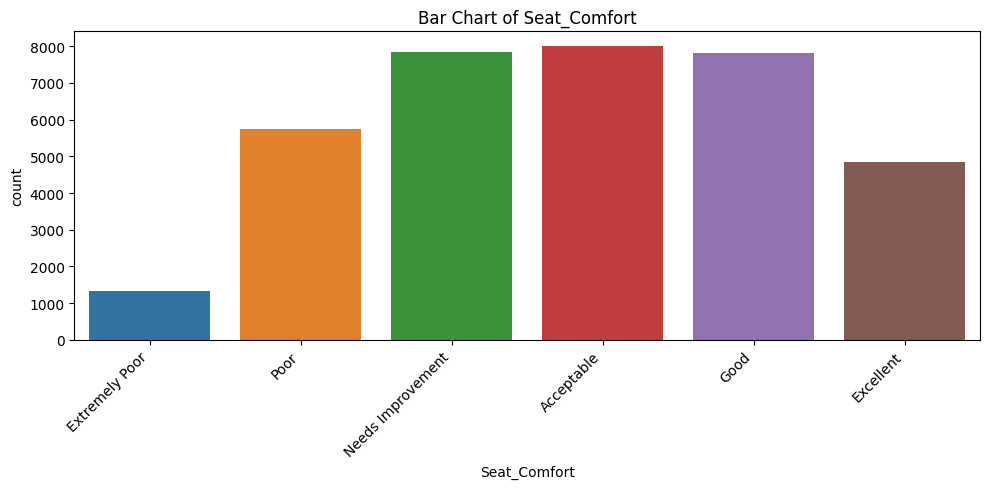

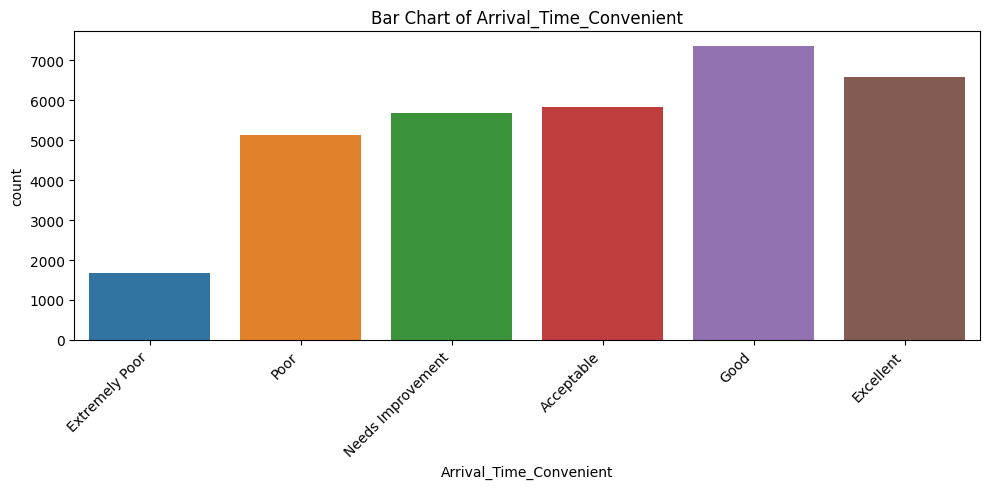

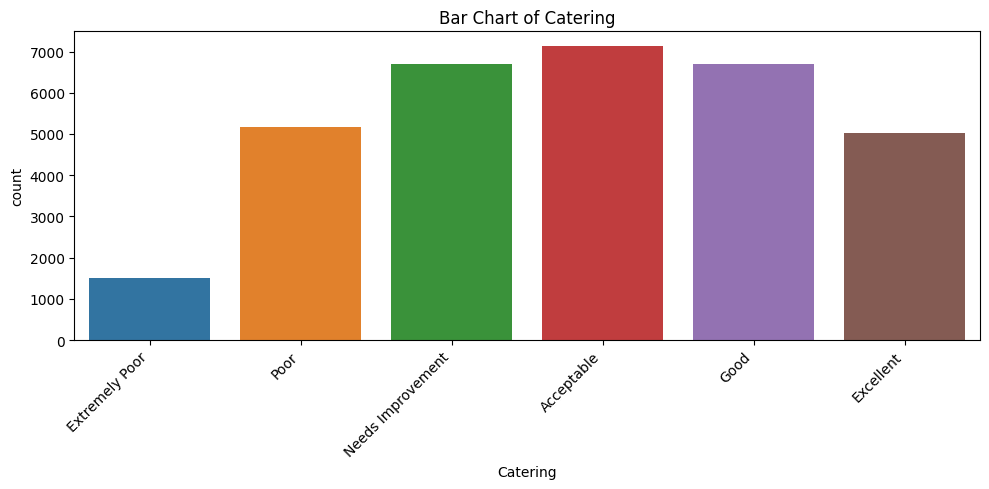

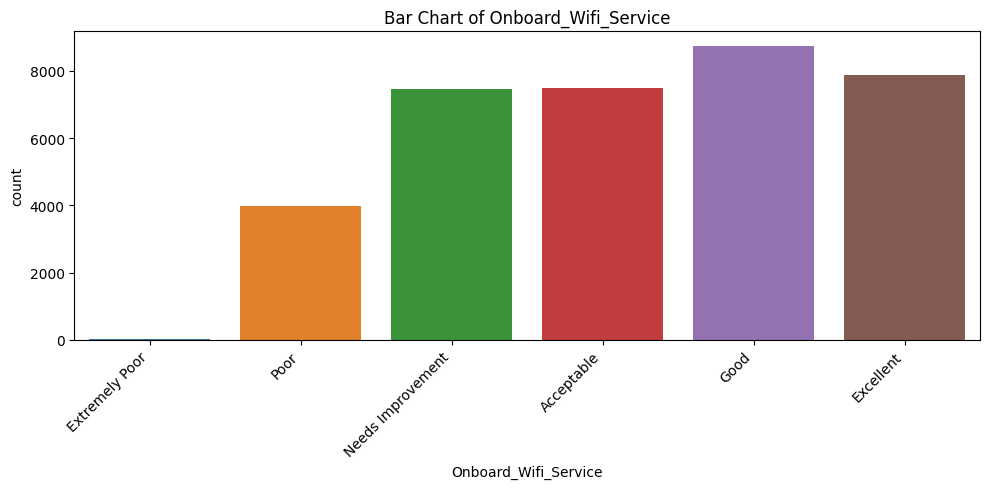

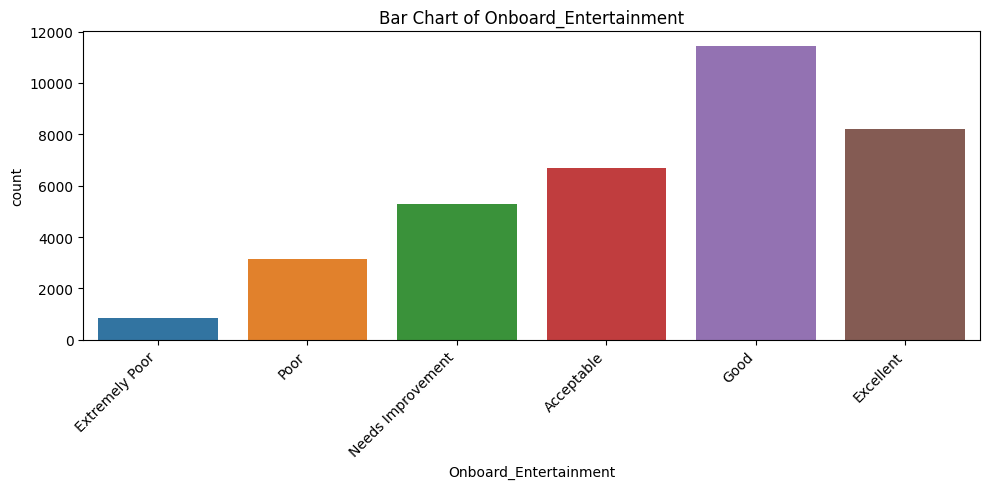

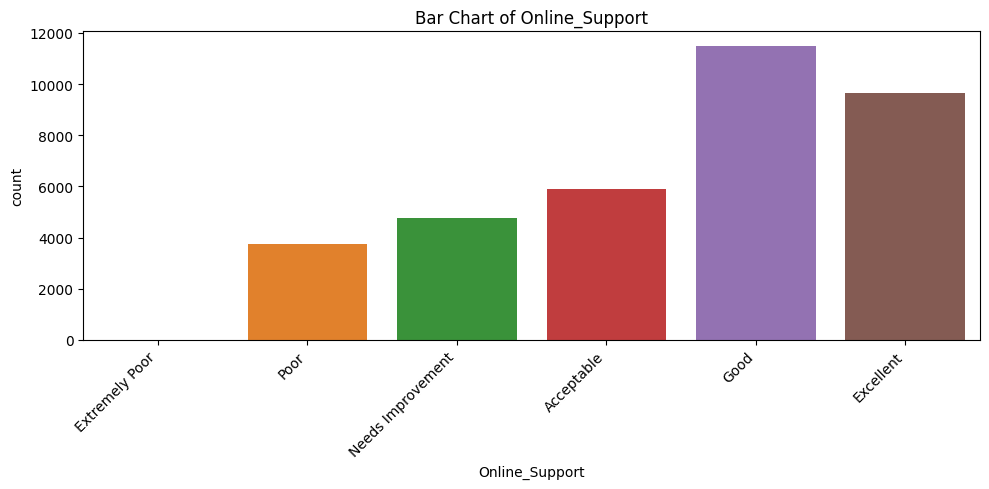

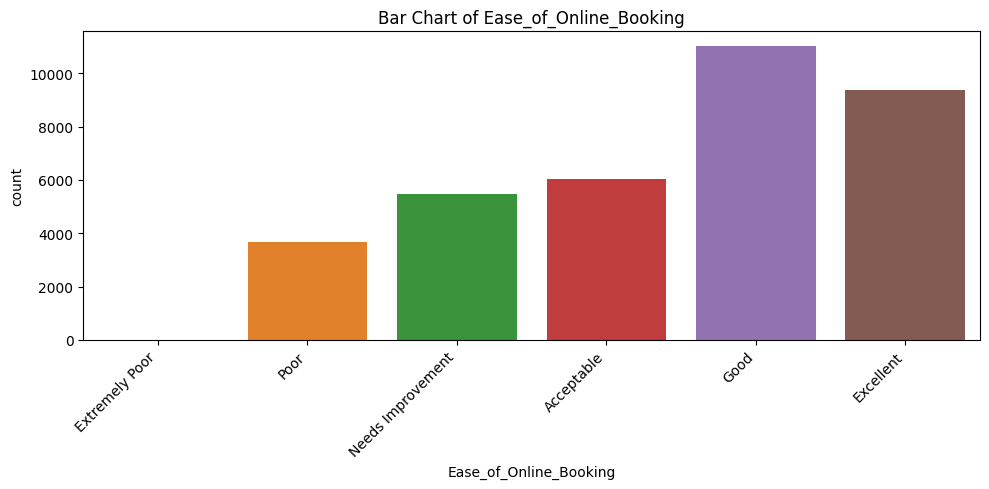

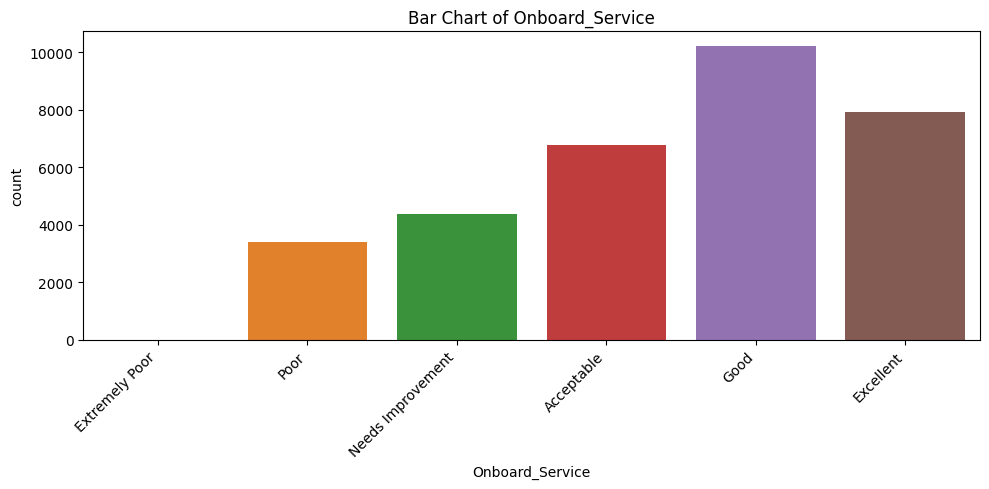

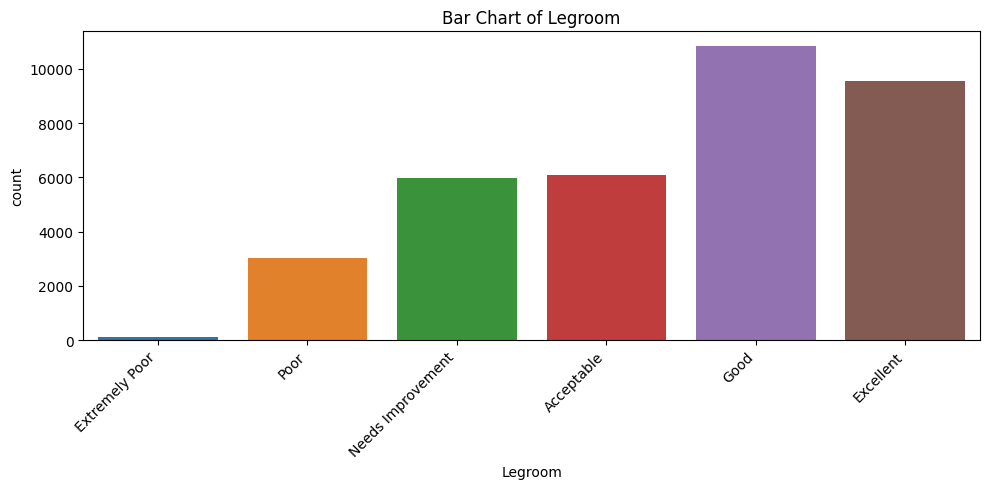

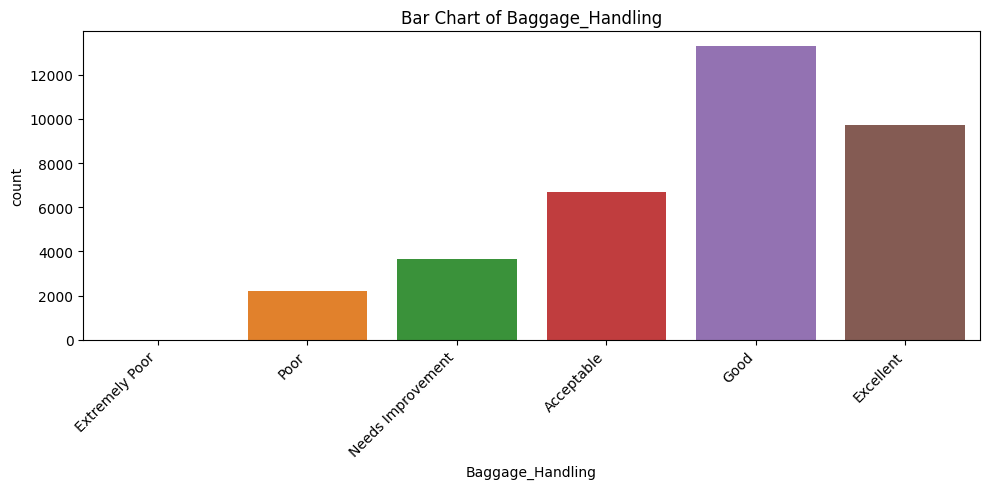

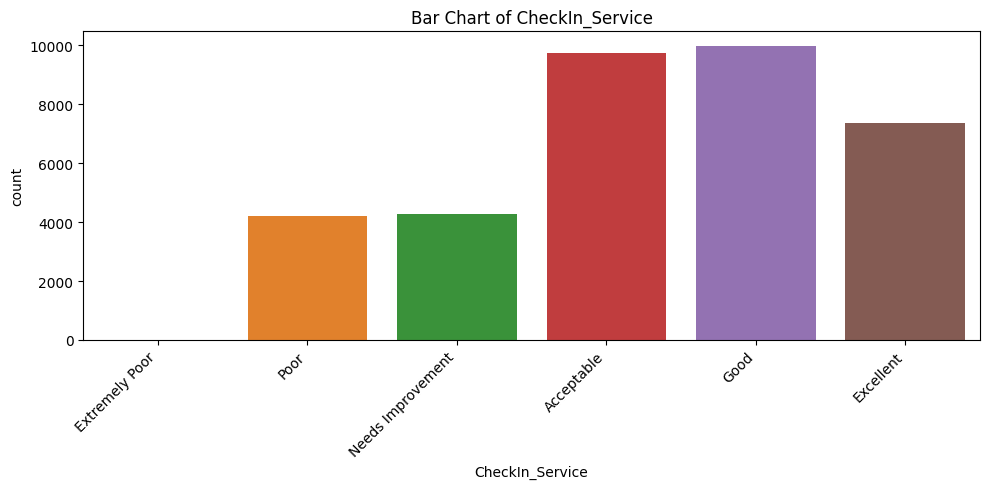

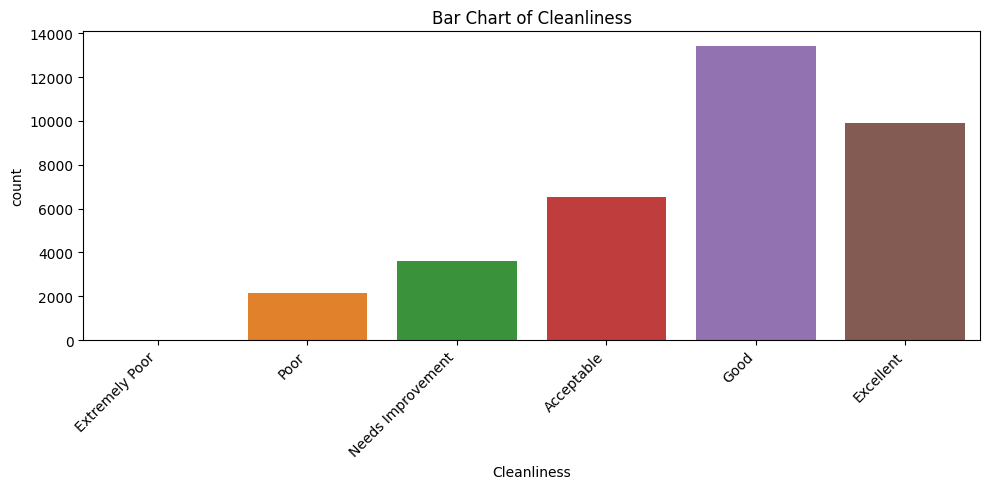

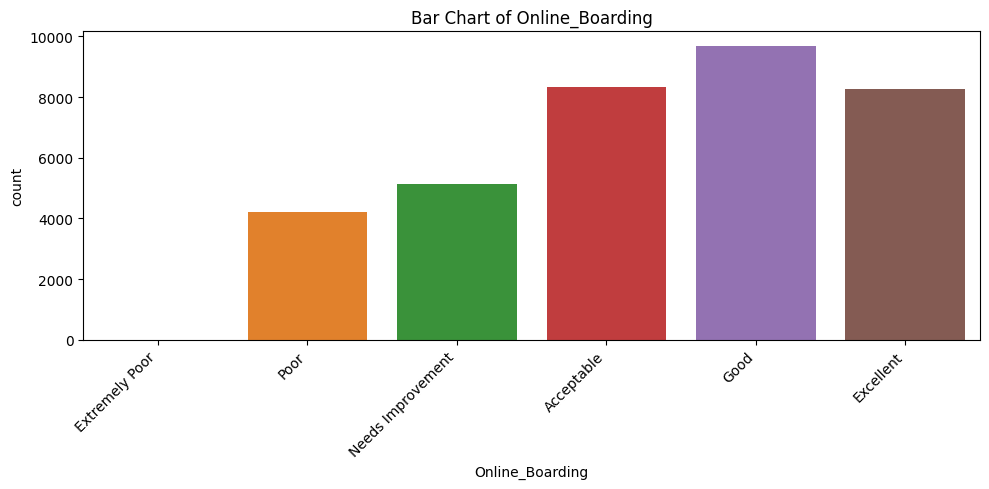

In [ ]:
# Creating charts for each of the categorical variables

# List of columns for which to create bar charts
columns_to_plot = [
    'Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Onboard_Wifi_Service',
    'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
    'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding'
]

# Define the desired order for all columns
category_orders = {
    column: ['Extremely Poor', 'Poor', 'Needs Improvement', 'Acceptable', 'Good', 'Excellent']
    for column in columns_to_plot
}

# Block of code that creates a bar chart for each categorical column with the specified order
for column in columns_to_plot:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=survey_data_test, order=category_orders[column])
    plt.title(f'Bar Chart of {column}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()  # Adjust the layout to ensure labels are not cut off
    plt.show()

It looks like the variables in survey_data_test have very similar distributions and features compared to survey_data_train, with the obvious except that the test set does not have "Overall_Experience", which is the dependent variable we will be looking for.

We can proceed with the data handling techniques we previously decided, namely:

-impute the values for columns with 0.1-0.2% missing values using the mode

-create a new value called "Unknown" for the columns with 8-9% missing values

-turn all object variables into category variables to ease processing

-perform label encoding for all relevant columns and one-hot encoding for "Seat_Class" as the order is irrelevant for that.

### Cleaning the survey datasets

In [ ]:
# Applying transformations to survey_data_train

# Make a copy of the dataset
df_survey_train = survey_data_train.copy()

# Impute missing values using the mode for columns with 0.1-0.2% missing values
cols_to_impute_mode = ['Seat_Comfort', 'Online_Support', 'Ease_of_Online_Booking', 'Legroom', 'Baggage_Handling', 'CheckIn_Service']
for col in cols_to_impute_mode:
    mode_value = df_survey_train[col].mode()[0]
    df_survey_train[col].fillna(mode_value, inplace=True)

# Create a new value "Unknown" for columns with 8-9% missing values
cols_to_create_unknown = ['Arrival_Time_Convenient', 'Catering', 'Onboard_Service']
for col in cols_to_create_unknown:
    df_survey_train[col].fillna('Unknown', inplace=True)

# Turn all object variables into category variables
object_columns = df_survey_train.select_dtypes(include=['object']).columns
df_survey_train[object_columns] = df_survey_train[object_columns].astype('category')

# Perform label encoding for relevant columns
cat_columns_to_encode = df_survey_train.select_dtypes(include=['category']).columns
df_survey_train[cat_columns_to_encode] = df_survey_train[cat_columns_to_encode].apply(lambda x: x.cat.codes)

# Perform one-hot encoding for the "Seat_Class" column
df_survey_train = pd.get_dummies(df_survey_train, columns=['Seat_Class'], drop_first=True)

# Display the first few rows of the transformed dataset
df_survey_train.head()


,ID,Overall_Experience,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Seat_Class_1
0,98800001,0,4,1,1,4,3,4,0,4,4,0,3,3,4,5,0
1,98800002,0,5,1,5,3,3,5,3,3,1,4,4,4,3,3,1
2,98800003,1,4,4,4,3,4,3,1,1,1,1,1,3,1,1,0
3,98800004,0,0,4,6,3,0,4,0,0,0,0,0,3,0,0,1
4,98800005,1,0,0,0,2,4,3,1,3,3,3,2,3,3,3,1


In [ ]:
# Applying same changes to survey_data_test

# Reload the dataset
survey_data_test = pd.read_csv(survey_data_test_path)

# Make a copy of the dataset
df_survey_test = survey_data_test.copy()

# Impute missing values using the mode for columns with 0.1-0.2% missing values
for col in cols_to_impute_mode:
    mode_value = df_survey_test[col].mode()[0]
    df_survey_test[col].fillna(mode_value, inplace=True)

# Create a new value "Unknown" for columns with 8-9% missing values
for col in cols_to_create_unknown:
    df_survey_test[col].fillna('Unknown', inplace=True)

# Turn all object variables into category variables
df_survey_test[object_columns] = df_survey_test[object_columns].astype('category')

# Perform label encoding for relevant columns
df_survey_test[cat_columns_to_encode] = df_survey_test[cat_columns_to_encode].apply(lambda x: x.cat.codes)

# Perform one-hot encoding for the "Seat_Class" column
df_survey_test = pd.get_dummies(df_survey_test, columns=['Seat_Class'], drop_first=True)

# Display the first few rows of the transformed dataset
df_survey_test.head()


,ID,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Seat_Class_1
0,99900001,0,0,0,2,4,1,2,1,1,1,1,2,1,5,0
1,99900002,2,3,5,2,0,5,0,0,1,0,2,0,1,0,1
2,99900003,1,1,1,4,1,1,1,4,3,4,3,2,3,1,1
3,99900004,0,1,0,4,5,0,1,5,0,4,1,1,1,5,0
4,99900005,1,2,1,3,1,1,1,1,5,0,1,1,1,1,1


## Combining Datasets and Preparing it for Analysis

Next, I will be combining the datasets based on the ID because only the survey data has the target variable of "Overall_Experience".  I will then perform some last cleaning steps and checks to make sure everything is in order.  

This will result in a very large dataset, with the training data containing ~90k rows and more than 20 columns.  One approach I considered is starting with a Decision Tree, determining feature importance, and then removing features that were determined to be unimportant.  First, however, I will attempt a Logistic Regression model, and simply the dataset using PCA.  I will ensure the data is fully scaled and other necessary transformations have been made, and then create the model.

In [ ]:
# Merge df_survey_train and df_travel_train to create combined_train
combined_train = pd.merge(df_survey_train, df_travel_train, on='ID')

# Merge df_survey_test and df_travel_test to create combined_test
combined_test = pd.merge(df_survey_test, df_travel_test, on='ID')


In [ ]:
combined_train.head()

,ID,Overall_Experience,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,...,Travel_Distance,Departure_Delay_Log,Arrival_Delay_Log,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_Unknown,Type_Travel_Personal Travel,Type_Travel_Unknown,Travel_Class_Eco,Total_Delay_Log
0,98800001,0,4,1,1,4,3,4,0,4,...,-1.660469,-0.760648,0.330184,0,1,0,0,1,0,1.791759
1,98800002,0,5,1,5,3,3,5,3,3,...,0.215099,0.664674,-0.771450,1,1,0,1,0,1,2.302585
2,98800003,1,4,4,4,3,4,3,1,1,...,-0.892926,1.936195,2.172061,0,1,0,0,0,0,5.283204
3,98800004,0,0,4,6,3,0,4,0,0,...,-1.166284,0.872953,1.038890,0,1,0,0,0,0,3.465736
4,98800005,1,0,0,0,2,4,3,1,3,...,0.002054,-0.760648,-0.771450,0,1,0,0,0,0,0.000000


In [ ]:
combined_train.shape

(94379, 28)

In [ ]:
combined_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            94379 non-null  int64  
 1   Overall_Experience            94379 non-null  int64  
 2   Seat_Comfort                  94379 non-null  int8   
 3   Arrival_Time_Convenient       94379 non-null  int8   
 4   Catering                      94379 non-null  int8   
 5   Platform_Location             94379 non-null  int8   
 6   Onboard_Wifi_Service          94379 non-null  int8   
 7   Onboard_Entertainment         94379 non-null  int8   
 8   Online_Support                94379 non-null  int8   
 9   Ease_of_Online_Booking        94379 non-null  int8   
 10  Onboard_Service               94379 non-null  int8   
 11  Legroom                       94379 non-null  int8   
 12  Baggage_Handling              94379 non-null  int8   
 13  C

The Total_Delay_Log has missing values, probably because I calculated it after I imputed missing values for the Departure_Delay and Arrival_Delay data.  I will impute those values using the median value.

I will also examine some of the other variables to determine if I can put them into less computation-intensive datatypes.

In [ ]:
# Specify the columns of interest
columns_of_interest = ['Age', 'Travel_Distance', 'Departure_Delay_Log', 'Arrival_Delay_Log']

# Use describe() to display summary statistics for the specified columns
summary_stats = combined_train[columns_of_interest].describe()

# Display the summary statistics
print(summary_stats)




                Age  Travel_Distance  Departure_Delay_Log  Arrival_Delay_Log
count  94379.000000     9.437900e+04         9.437900e+04       9.437900e+04
mean      39.419850    -4.042864e-17        -1.017115e-16       1.505722e-19
std       15.113993     1.000005e+00         1.000005e+00       1.000005e+00
min        7.000000    -1.876431e+00        -7.606475e-01      -7.714501e-01
25%       27.000000    -6.030301e-01        -7.606475e-01      -7.714501e-01
50%       40.000000    -5.436829e-02        -7.606475e-01      -7.714501e-01
75%       51.000000     5.439066e-01         8.270795e-01       8.511312e-01
max       85.000000     4.836894e+00         3.803539e+00       3.758853e+00


In [ ]:
# Making a few changes to the combined dataset

# Turning 'Overall_Experience' into int16
combined_train['Overall_Experience'] = combined_train['Overall_Experience'].astype('int16')

# Imputing missing values for Total_Delay_Log using median
delay_mean = combined_train['Total_Delay_Log'].median()
combined_train['Total_Delay_Log'].fillna(age_median, inplace=True)

# Scale Age in a separate step specifically for Logistic Regression

# Scaling 'Age' for Logistic Regression
# Initialize the scaler
# scaler = StandardScaler()

# Apply scaling to 'Age'
# combined_train['Age'] = scaler.fit_transform(combined_train[['Age']])

In [ ]:
combined_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            94379 non-null  int64  
 1   Overall_Experience            94379 non-null  int16  
 2   Seat_Comfort                  94379 non-null  int8   
 3   Arrival_Time_Convenient       94379 non-null  int8   
 4   Catering                      94379 non-null  int8   
 5   Platform_Location             94379 non-null  int8   
 6   Onboard_Wifi_Service          94379 non-null  int8   
 7   Onboard_Entertainment         94379 non-null  int8   
 8   Online_Support                94379 non-null  int8   
 9   Ease_of_Online_Booking        94379 non-null  int8   
 10  Onboard_Service               94379 non-null  int8   
 11  Legroom                       94379 non-null  int8   
 12  Baggage_Handling              94379 non-null  int8   
 13  C

Now to perform the same changes to the test sets.

In [ ]:
combined_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            35602 non-null  int64  
 1   Seat_Comfort                  35602 non-null  int8   
 2   Arrival_Time_Convenient       35602 non-null  int8   
 3   Catering                      35602 non-null  int8   
 4   Platform_Location             35602 non-null  int8   
 5   Onboard_Wifi_Service          35602 non-null  int8   
 6   Onboard_Entertainment         35602 non-null  int8   
 7   Online_Support                35602 non-null  int8   
 8   Ease_of_Online_Booking        35602 non-null  int8   
 9   Onboard_Service               35602 non-null  int8   
 10  Legroom                       35602 non-null  int8   
 11  Baggage_Handling              35602 non-null  int8   
 12  CheckIn_Service               35602 non-null  int8   
 13  C

In [ ]:
# Making a few changes to the combined test dataset, the same that I made to the combined train

# Imputing missing values for Total_Delay_Log using median
delay_mean = combined_test['Total_Delay_Log'].median()
combined_test['Total_Delay_Log'].fillna(age_median, inplace=True)

# Scaling 'Age' for Logistic Regression
# Initialize the scaler
# scaler = StandardScaler()

# Apply scaling to 'Age'
# combined_test['Age'] = scaler.fit_transform(combined_test[['Age']])

# Logistic Regression Model

The first model I will make is a simple logistic regression model to see what baseline performance I can get from that for this classification problem.

## PCA

In order to create a logistic regression model with this large a dataset, I will be performing PCA.

In [ ]:
from sklearn.decomposition import PCA

# Select features for PCA
X_train = combined_train.drop(columns=['Overall_Experience', 'ID'])
X_test = combined_test.drop(columns=['ID'])

# Initialize PCA with desired number of components or variance explained
pca = PCA(n_components=0.95)  # Retain 95% of variance explained

# Fit PCA on the training data
pca.fit(X_train)

# Transform the data to reduced feature space
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# Check explained variance by each component
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Print explained variance for each component
print("Explained Variance by Component:")
for i, variance in enumerate(explained_variance):
    print(f"Component {i + 1}: {variance:.4f}")

# Print cumulative explained variance
print("\nCumulative Explained Variance:")
for i, cumulative in enumerate(cumulative_variance):
    print(f"Components {i + 1}: {cumulative:.4f}")

Explained Variance by Component:
Component 1: 0.1660
Component 2: 0.1401
Component 3: 0.1333
Component 4: 0.0955
Component 5: 0.0603
Component 6: 0.0555
Component 7: 0.0452
Component 8: 0.0366
Component 9: 0.0361
Component 10: 0.0324
Component 11: 0.0291
Component 12: 0.0277
Component 13: 0.0245
Component 14: 0.0235
Component 15: 0.0228
Component 16: 0.0168
Component 17: 0.0149

Cumulative Explained Variance:
Components 1: 0.1660
Components 2: 0.3061
Components 3: 0.4394
Components 4: 0.5348
Components 5: 0.5951
Components 6: 0.6507
Components 7: 0.6959
Components 8: 0.7324
Components 9: 0.7686
Components 10: 0.8010
Components 11: 0.8302
Components 12: 0.8579
Components 13: 0.8824
Components 14: 0.9059
Components 15: 0.9287
Components 16: 0.9455
Components 17: 0.9604


It takes 17 different components to explain 95% of the variance, which is a drop from the 25 full columns in the dataset.  If I accept a 90% variance explanation, I can reduce this to 14 components.

## Logistic Regression

In [ ]:
# Splitting the combined_train into training and testing sets, using my PCA results

from sklearn.model_selection import train_test_split

# Split the reduced feature set for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_train_pca,  # Reduced feature set
    combined_train['Overall_Experience'],  # Target variable
    test_size=0.2,  # Adjust the test size as needed
    random_state=42  # Set a random state for reproducibility
)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = model.score(X_test, y_test)
print(f"Accuracy on Test Data: {accuracy:.4f}")


Accuracy on Test Data: 0.6604


This isn't a whole lot better than random guessing, but it's a start.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],  # Solver algorithms
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1  # Use all available CPU cores for parallel processing
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

best_model_accuracy = best_estimator.score(X_test, y_test)
print(f"Best Model Accuracy on Test Data: {best_model_accuracy:.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Model Accuracy on Test Data: 0.6610


Almost no improvement seen with hyperparameter tuning. Let's proceed with generating our predictions with this model regardless.

## Generating a prediction of "Overall_Experience"

In [ ]:

# Predict 'Overall_Experience' scores for the test set using the best_estimator
predicted_scores = best_estimator.predict(X_test_pca)


Generating a DataFrame

Applying the best current model to combined_test

In [ ]:
# Create a DataFrame with 'ID' and 'Predicted_Score' columns
result_df = pd.DataFrame({'ID': combined_test['ID'], 'Overall_Experience': predicted_scores})

Creating the CSV

In [ ]:
# Save the DataFrame as a CSV file
result_df.to_csv('predicted_scores1.csv', index=False)

The final result is an accuracy of 66%.  That is pretty poor, so let's see if we can do better with a Decision Tree.

# Decision Tree Model

## Re-examining the data sets

This is just to reconfirm that everything is as it should be before we proceed with the Decision Tree model.

In [ ]:
combined_train.head()

,ID,Overall_Experience,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,...,Travel_Distance,Departure_Delay_Log,Arrival_Delay_Log,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_Unknown,Type_Travel_Personal Travel,Type_Travel_Unknown,Travel_Class_Eco,Total_Delay_Log
0,98800001,0,4,1,1,4,3,4,0,4,...,272,0.000000,1.791759,0,1,0,0,1,0,1.791759
1,98800002,0,5,1,5,3,3,5,3,3,...,2200,2.302585,0.000000,1,1,0,1,0,1,2.302585
2,98800003,1,4,4,4,3,4,3,1,1,...,1061,4.356709,4.787492,0,1,0,0,0,0,5.283204
3,98800004,0,0,4,6,3,0,4,0,0,...,780,2.639057,2.944439,0,1,0,0,0,0,3.465736
4,98800005,1,0,0,0,2,4,3,1,3,...,1981,0.000000,0.000000,0,1,0,0,0,0,0.000000


In [ ]:
combined_test.head()

,ID,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,...,Travel_Distance,Departure_Delay_Log,Arrival_Delay_Log,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_Unknown,Type_Travel_Personal Travel,Type_Travel_Unknown,Travel_Class_Eco,Total_Delay_Log
0,99900001,0,0,0,2,4,1,2,1,1,...,532,0.000000,0.000000,0,0,1,0,0,0,0.000000
1,99900002,2,3,5,2,0,5,0,0,1,...,1425,2.302585,3.367296,0,0,0,0,0,0,3.637586
2,99900003,1,1,1,4,1,1,1,4,3,...,2832,0.000000,0.000000,1,1,0,0,0,0,0.000000
3,99900004,0,1,0,4,5,0,1,5,0,...,1352,0.000000,0.000000,0,1,0,1,0,1,0.000000
4,99900005,1,2,1,3,1,1,1,1,5,...,1610,2.890372,0.000000,1,0,0,0,0,0,2.890372


The training and testing datasets are all as they should be.

## Setting up the model

Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Split combined_train into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    combined_train.drop(columns=['Overall_Experience']),  # Features
    combined_train['Overall_Experience'],  # Target variable
    test_size=0.2,  # Adjust the test size as needed
    random_state=42  # Set a random state for reproducibility
)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and fit the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
accuracy = decision_tree_model.score(X_test, y_test)
print(f"Accuracy on Test Data: {accuracy:.4f}")


Accuracy on Test Data: 0.9177


A basic, simple Decision Tree is demonstrating much higher accuracy than my logistic regression model.  Let's analyze the feature importances next, and then we'll work on hyperparameter tuning.

## Analyzing Feature Importance

In [ ]:
#Analyzing feature importance

importances = decision_tree_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                         Feature  Importance
6          Onboard_Entertainment    0.413010
1                   Seat_Comfort    0.160089
8         Ease_of_Online_Booking    0.051527
17               Travel_Distance    0.030007
2        Arrival_Time_Convenient    0.028770
7                 Online_Support    0.026740
16                           Age    0.025574
0                             ID    0.022381
25              Travel_Class_Eco    0.022129
23   Type_Travel_Personal Travel    0.019844
11              Baggage_Handling    0.019452
20                   Gender_Male    0.018810
13                   Cleanliness    0.018787
4              Platform_Location    0.017867
21  Customer_Type_Loyal Customer    0.017564
3                       Catering    0.016198
12               CheckIn_Service    0.015597
10                       Legroom    0.012426
19             Arrival_Delay_Log    0.012328
26               Total_Delay_Log    0.009167
14               Online_Boarding    0.008625
9         

Onboard_Entertainment and Seat_Comfort are by far the strongest predictors, but let's also consider a greater range of factors.

Based on these importances, I'm going to train a model on the top 9 features, which is all of them above the 0.02 threshold.  

In [ ]:
# Subset the top features
top_n = 9
top_features = feature_importance_df['Feature'].head(top_n).tolist()
X_train_subset = combined_train[top_features]
y_train_subset = combined_train['Overall_Experience']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_train_subset,  # Subset of features
    y_train_subset,  # Target variable
    test_size=0.2,  # Adjust the test size as needed
    random_state=42  # Set a random state for reproducibility
)

# Initialize and fit the Decision Tree model using the subset of features
decision_tree_model_subset = DecisionTreeClassifier(random_state=42)
decision_tree_model_subset.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = decision_tree_model_subset.score(X_test, y_test)
print(f"Accuracy on Test Data with Top {top_n} Features: {accuracy:.4f}")


Accuracy on Test Data with Top 9 Features: 0.8812


Okay, the accuracy has fallen by reducing the number of parameters, so we'll take the previous decision tree and tune the hyperparameters.

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their respective ranges
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'splitter': ['best', 'random'],     # Splitting strategy
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum samples required at a leaf node
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=decision_tree_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,               # Number of cross-validation folds
    n_jobs=-1            # Use all available CPU cores for parallel processing
)

# Fit the GridSearch to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_estimator.score(X_test, y_test)
print(f"Best Model Accuracy on Test Data: {accuracy:.4f}")


Best Model Accuracy on Test Data: 0.9283


This model is performing a touch better than that of the base, untuned model, which had an accuracy of 0.9177.  

I will now use this tuned model to generate a prediction for "Overall_Experience" in the combined_test dataset, and then create a csv of the predictions.

**Generating predictions and saving them to csv.**

In [ ]:

# Predict 'Overall_Experience' on the combined_test dataset using all its features
test_predictions = best_estimator.predict(combined_test)

# Create a DataFrame with 'ID' and the predictions
result_df = pd.DataFrame({'ID': combined_test['ID'], 'Overall_Experience': test_predictions})

# Save the DataFrame to a CSV file
result_df.to_csv('predicted_scores2.csv', index=False)



This tuned Decision Tree model generated a prediction for the Overall_Experience of all the IDs in the combined_test dataset, with an overall accuracy of 90.9%.  A substantial improvement over the 66.5% accuracy of the Logistic Regression Model.

Let's see if we can get better results with lots of DTs by using a Random Forest Classifier.

# Random Forest Model

## Re-examining the datasets

No changes have been made to the dataset since I've been running, so I will continue with combined_train and combined_test to work on my model.

## Setting up the model

Setting up a more robust set of metrics to use on this and subsequent models

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, auc

def evaluate_classification_model(model, X_test, y_test):
    """
    Evaluate a classification model and calculate various metrics.

    Args:
    model (object): The trained classification model.
    X_test (DataFrame): The feature matrix of the test dataset.
    y_test (Series): The target variable of the test dataset.

    Returns:
    dict: A dictionary containing accuracy, precision, recall, f1-score, and precision-recall curve data.
    """
    # Make predictions on the test data
    test_predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, test_predictions)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, test_predictions)
    recall = recall_score(y_test, test_predictions)
    f1 = f1_score(y_test, test_predictions)

    # Calculate precision-recall curve and AUC-PR
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc_pr = auc(recall_curve, precision_curve)

    # Create a dictionary to store the metrics
    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Precision-Recall Curve': (precision_curve, recall_curve, auc_pr)
    }

    return metrics


**Creating the Random Forest Model**

In [ ]:
# Creating the Random Forest Model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Step 1: Preparing the data
X = combined_train.drop(columns=['Overall_Experience', 'ID'])
y = combined_train['Overall_Experience']

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Step 4: Evaluate the model on the test data
evaluation_results = evaluate_classification_model(random_forest_model, X_test, y_test)

# Access the metrics
print(f"Accuracy: {evaluation_results['Accuracy']:.4f}")
print(f"Precision: {evaluation_results['Precision']:.4f}")
print(f"Recall: {evaluation_results['Recall']:.4f}")
print(f"F1-Score: {evaluation_results['F1-Score']:.4f}")

# Access the precision-recall curve data
precision_curve, recall_curve, auc_pr = evaluation_results['Precision-Recall Curve']

Accuracy: 0.9447
Precision: 0.9555
Recall: 0.9443
F1-Score: 0.9499


Great! We've got a marginal but significant improvement over the baseline DT model, with an accuracy of 94.47%.  Let's see if we can improve that with hyperparameter tuning.

## Hyperparameter Tuning

**Tuning the Random Forest model:**

I also include a custom progress bar in order to monitor progress.

In [1]:
# Tuning the Random Forest model

# Reloading some of the necessary libraries to ensure they are ready
# I also include a progress bar since hyperparameter tuning on an RF takes a long time
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm # Used for the progress bar
import sys
import numpy as np
from sklearn.model_selection import cross_val_score  # Import the cross_val_score function

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],  # Removed 'auto' and added 'sqrt' to save time
    'random_state': [42],
}

# Create an instance of the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Create a grid of parameters
parameter_grid = list(ParameterGrid(param_grid))

# Initialize a progress bar
pbar = tqdm(total=len(parameter_grid), file=sys.stdout, leave=True, dynamic_ncols=True, bar_format='{l_bar}{bar}| [{elapsed}<{remaining}, {rate_fmt}]')

# Define a function to perform grid search with progress bar updates
def grid_search_with_progress(estimator, parameter_grid, X_train, y_train, scoring='accuracy', cv=3):
    best_score = None
    best_params = None
    for params in parameter_grid:
        estimator.set_params(**params)
        scores = cross_val_score(estimator, X_train, y_train, scoring=scoring, cv=cv)
        score = np.mean(scores)
        if best_score is None or score > best_score:
            best_score = score
            best_params = params
        pbar.update(1)
    return best_score, best_params

# Perform the grid search
best_score, best_params = grid_search_with_progress(rf_classifier, parameter_grid, X_train, y_train)

pbar.close()

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)


  0%|          | [00:00<?, ?it/s]

NameError: name 'X_train' is not defined


Best Hyperparameters:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150, 'random_state': 42}

Let's train a Random Forest model with these parameters.

In [ ]:
# Step 1: Create the model with best hyperparameters
final_rf_classifier = RandomForestClassifier(**best_params)

# Step 2: Train the model
final_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=150, random_state=42)

**Evaluating the Model**

In [ ]:
# Evaluate the model
evaluation_results = evaluate_classification_model(final_rf_classifier, X_test, y_test)

# Access the metrics
print(f"Accuracy: {evaluation_results['Accuracy']:.4f}")
print(f"Precision: {evaluation_results['Precision']:.4f}")
print(f"Recall: {evaluation_results['Recall']:.4f}")
print(f"F1-Score: {evaluation_results['F1-Score']:.4f}")

# Access the precision-recall curve data
precision_curve, recall_curve, auc_pr = evaluation_results['Precision-Recall Curve']

Accuracy: 0.9454
Precision: 0.9539
Recall: 0.9474
F1-Score: 0.9506


The untuned model had:
Accuracy: 0.9447
Precision: 0.9555
Recall: 0.9443
F1-Score: 0.9499

The tuned model has:
Accuracy: 0.9454
Precision: 0.9539
Recall: 0.9474
F1-Score: 0.9506

There was not much gained from the hyperparameter tuning, especially in accuracy.

Now, let's use this tuned Random Forest Model to create predictions for Overall_Experience for the combined_test dataset and produce a csv with the results.

In [ ]:

# Predict 'Overall_Experience' on the combined_test dataset using all its features
test_predictions = final_rf_classifier.predict(combined_test.drop("ID", axis=1))

# Create a DataFrame with 'ID' and the predictions
result_df = pd.DataFrame({'ID': combined_test['ID'], 'Overall_Experience': test_predictions})

# Save the DataFrame to a CSV file
result_df.to_csv('predicted_scores3.csv', index=False)


This tuned Random Forest model generated a prediction for the Overall_Experience of all the IDs in the combined_test dataset, with an overall accuracy of 93.6%.

Let's see if we can get better results with a booster, such as XGboost.

# XGBoost Model

## Understanding XGBoost (eXtreme Gradient Boosting)

XGBoost stands for eXtreme Gradient Boosting, an advanced and efficient implementation of gradient boosting algorithms. It is widely used in machine learning for its performance and scalability, especially in problems where structured data is involved.

### How XGBoost Works

1. **Ensemble Learning**: At its core, XGBoost is an ensemble learning method, meaning it combines the predictions from multiple models for improved accuracy. It primarily builds a series of decision trees sequentially.

2. **Gradient Boosting Framework**: XGBoost applies the principle of gradient boosting. It starts with an initial prediction (usually a simple average of the target variable) and iteratively adds new trees that predict and correct the errors made by the previous trees.

3. **Handling Overfitting**: To prevent overfitting, XGBoost introduces regularization terms (L1 and L2 regularization) in its loss function, which are not present in traditional gradient boosting methods.

4. **Optimization for Speed and Performance**: XGBoost is optimized for both speed and performance. It uses a unique tree learning algorithm and efficient memory usage. Its ability to handle sparse data, missing values, and various custom optimization objectives and evaluation criteria makes it a versatile tool.

5. **Parallel and Distributed Computing**: One of the key features of XGBoost is its capability to leverage parallel and distributed computing, making it extremely fast compared to traditional gradient boosting implementations.

In summary, XGBoost is a powerful, flexible, and efficient machine learning algorithm, particularly effective for structured data and competitive in a wide range of classification and regression tasks.


## Preparing the data

I don't believe there is any additional massaging of the data that I need to perform for XGBoost, but I'll leave this as a note to self.  I will split combined_train dataset into train, test, and validation sets.  

## Setting up the model

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Split combined_train into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(
    combined_train.drop(columns=['Overall_Experience']),  # Features
    combined_train['Overall_Experience'],  # Target variable
    test_size=0.3,  # Adjust the size for validation set as needed
    random_state=42  # Set a random state for reproducibility
)

# Further split X_temp and y_temp into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Initialize the XGBoost classifier with hyperparameters
xgb_model = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,  # Adjust as needed
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the XGBoost model on the training set
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Now to evaluate the model's performance.

In [ ]:
# Evaluate the model
evaluation_results = evaluate_classification_model(xgb_model, X_test, y_test)

# Access the metrics
print(f"Accuracy: {evaluation_results['Accuracy']:.4f}")
print(f"Precision: {evaluation_results['Precision']:.4f}")
print(f"Recall: {evaluation_results['Recall']:.4f}")
print(f"F1-Score: {evaluation_results['F1-Score']:.4f}")

# Access the precision-recall curve data
precision_curve, recall_curve, auc_pr = evaluation_results['Precision-Recall Curve']

Accuracy: 0.9215
Precision: 0.9234
Recall: 0.9344
F1-Score: 0.9289


This is good, but let's see if we can improve it with hyperparameter tuning.

## Hyperparameter Tuning

Here is where I perform a GridSearchCV to identify the best hyperparameters to use for this model. This also utilizes a progress bar to keep track of how long it will take.

In [ ]:
# Reimporting necessary models

from sklearn.model_selection import cross_val_score, ParameterGrid
from tqdm import tqdm # For the progress bar
import sys

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Create an instance of the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Create a grid of parameters
parameter_grid = list(ParameterGrid(param_grid))

# Initialize a progress bar
pbar = tqdm(total=len(parameter_grid), file=sys.stdout, leave=True, dynamic_ncols=True, bar_format='{l_bar}{bar}| [{elapsed}<{remaining}, {rate_fmt}]')

# Define the grid search function with progress bar updates
def grid_search_with_progress(estimator, parameter_grid, X_train, y_train, scoring='accuracy', cv=3):
    best_score = None
    best_params = None
    for params in parameter_grid:
        estimator.set_params(**params)
        scores = cross_val_score(estimator, X_train, y_train, scoring=scoring, cv=cv)
        score = np.mean(scores)
        if best_score is None or score > best_score:
            best_score = score
            best_params = params
        pbar.update(1)
    pbar.close()
    return best_score, best_params

# Perform the grid search
best_score, best_params = grid_search_with_progress(xgb_classifier, parameter_grid, X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

100%|██████████| [02:22<00:00,  1.76s/it]
Best Hyperparameters:
{'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}


{'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}

Now let's fit a model with these parameters and evaluate its performance.

In [ ]:
# Step 1: Create the model with best hyperparameters
final_xgb = xgb.XGBClassifier(random_state=42, **best_params)

# Step 2: Train the model
final_xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Evaluate the model
evaluation_results = evaluate_classification_model(final_xgb, X_test, y_test)

# Access the metrics
print(f"Accuracy: {evaluation_results['Accuracy']:.4f}")
print(f"Precision: {evaluation_results['Precision']:.4f}")
print(f"Recall: {evaluation_results['Recall']:.4f}")
print(f"F1-Score: {evaluation_results['F1-Score']:.4f}")

# Access the precision-recall curve data
precision_curve, recall_curve, auc_pr = evaluation_results['Precision-Recall Curve']

Accuracy: 0.9478
Precision: 0.9552
Recall: 0.9494
F1-Score: 0.9523


This is a really solid performance; our best so far.  Let's generate predictions and create a csv to upload.

In [ ]:
# Predict 'Overall_Experience' on the combined_test dataset using all its features
test_predictions = final_xgb.predict(combined_test)

# Create a DataFrame with 'ID' and the predictions
result_df = pd.DataFrame({'ID': combined_test['ID'], 'Overall_Experience': test_predictions})

# Save the DataFrame to a CSV file
result_df.to_csv('predicted_scores4.csv', index=False)

This yielded 94.4%.  It's getting better.  Now, I noticed that I forgot to drop the 'ID' column when I trained the model, so I'm going to train another XGBoost model with a more appropriate data split.

In [ ]:
# Split combined_train into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(
    combined_train.drop(columns=['Overall_Experience', 'ID']),  # Features
    combined_train['Overall_Experience'],  # Target variable
    test_size=0.3,  # Adjust the size for validation set as needed
    random_state=42  # Set a random state for reproducibility
)

# Further split X_temp and y_temp into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Initialize the XGBoost classifier with hyperparameters
xgb_new = xgb.XGBClassifier(**best_params, random_state=42)

# Step 2: Train the model
xgb_new.fit(X_train, y_train)

# Evaluate the model
evaluation_results = evaluate_classification_model(xgb_new, X_test, y_test)

# Access the metrics
print(f"Accuracy: {evaluation_results['Accuracy']:.4f}")
print(f"Precision: {evaluation_results['Precision']:.4f}")
print(f"Recall: {evaluation_results['Recall']:.4f}")
print(f"F1-Score: {evaluation_results['F1-Score']:.4f}")

# Access the precision-recall curve data
precision_curve, recall_curve, auc_pr = evaluation_results['Precision-Recall Curve']

Accuracy: 0.9504
Precision: 0.9584
Recall: 0.9510
F1-Score: 0.9546


A tiny improvement, but let's generate and check the predictions it makes.

In [ ]:
# Predict 'Overall_Experience' on the combined_test dataset using all its features
test_predictions = xgb_new.predict(combined_test.drop("ID", axis=1))

# Create a DataFrame with 'ID' and the predictions
result_df = pd.DataFrame({'ID': combined_test['ID'], 'Overall_Experience': test_predictions})

# Save the DataFrame to a CSV file
result_df.to_csv('predicted_scores5.csv', index=False)

We achieve an incremental improvement from this change, from 94.4% to 94.8%.  This is our best performing model so far.

After exploring traditional machine learning models and achieving an accuracy of 94.8% with the XGBoost model, I decided to explore the potential of neural networks for this classification task. Neural networks are powerful tools capable of capturing complex patterns in the data, and they might offer improved performance for this particular problem.

# Neural Network Model

### Neural Network Model

In this section, I will explore the use of a neural network model to predict passenger satisfaction. Neural networks are particularly good at handling nonlinear relationships and interactions between features, making them a strong candidate for this complex classification task. The first step in this process is to prepare the data appropriately for the neural network.

## Preparing the data

 #### Data Normalization
 Neural networks often require the input data to be normalized to ensure that the gradient descent algorithm used in the training process converges more quickly. In this step, I'll normalize the feature columns to have a mean of 0 and a standard deviation of 1, which is a common practice for neural network models.

#### Data Splitting
It's crucial to split the dataset not only into training and testing sets but also to include a validation set. The validation set is used to evaluate the model during training, allowing for the monitoring of model performance and the prevention of overfitting. I'll create a training, validation, and test set in the following code cells.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Remove 'ID' column and separate features and target variable
features = combined_train.drop(columns=['Overall_Experience', 'ID'])
target = combined_train['Overall_Experience']

# Split into training (80%) and temp (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(
    features, target, test_size=0.2, random_state=42)

# Further split temp set into validation (50%) and testing (50%) sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Prepare combined_test dataset by removing 'ID' column and scaling
combined_test_features = combined_test.drop(columns=['ID'])
combined_test_scaled = scaler.transform(combined_test_features)



## Setting up the model

Architecture and Training

Now that the data is properly prepared, it's time to define the neural network architecture. I'll construct a model using layers that are suitable for the complexity of the problem. After defining the model, I'll compile it, setting up the loss function, optimizer, and metrics to monitor. Then, I'll train the model on the training data while validating it on the validation set.

Here I'll be starting off with a neural network with 27 neurons in the input layer to represent each feature that isn't 'ID' or the dependent variable of 'Overall_Experience', then have three increasingly smaller hidden layers with flattening layers in between, and an output layer with a single neuron with sigmoid activation to represent the prediction.

I'll be using Adam as the optimizer, and incorporating Early Stopping and Model Checkpoints so that it will run until it stops improving on the validation set but will keep the best performing version.

I tried a number of different versions of this model throughout this section with various tweaks.  Initially, I forgot that neural networks generate final values between '0' and '1' and that I therefore needed to set a threshold so that the final predictions could be exactly '0' or exactly '1'.  I generated 4 different models over this, then ultimately used the best performing one (based on the final validation loss) to generate the final prediction set.

**NN Model 4**

This model only has one hidden layer, with 33% dropouts between layers, and relu activation for all but the output layer.

In [ ]:
# Importing libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1) # This will stop it if the model doesn't improve in 5 iterations in a row.

# Model checkpoint callback
model_checkpoint = ModelCheckpoint('best_model4.h5', monitor='val_loss', save_best_only=True, verbose=1) # This saves the best model

# Neural network architecture
model4 = Sequential()
model4.add(Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'))  # Dynamically set input features
model4.add(Dropout(0.33))
model4.add(Dense(32, activation='relu'))
model4.add(Dropout(0.33))
model4.add(Dense(1, activation='sigmoid'))  # Adjust the output layer as per your requirement

# Compile the model
model4.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model with callbacks
model4.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),
          epochs=100, batch_size=32, callbacks=[early_stopping, model_checkpoint], verbose=1)


Epoch 1/100
2343/2360 [============================>.] - ETA: 0s - loss: 0.4487 - accuracy: 0.7892
Epoch 1: val_loss improved from inf to 0.31593, saving model to best_model4.h5
2360/2360 [==============================] - 15s 5ms/step - loss: 0.4484 - accuracy: 0.7895 - val_loss: 0.3159 - val_accuracy: 0.8644
Epoch 2/100
  75/2360 [..............................] - ETA: 4s - loss: 0.3658 - accuracy: 0.8425

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2360/2360 [==============================] - ETA: 0s - loss: 0.3369 - accuracy: 0.8556
Epoch 2: val_loss improved from 0.31593 to 0.25826, saving model to best_model4.h5
2360/2360 [==============================] - 7s 3ms/step - loss: 0.3369 - accuracy: 0.8556 - val_loss: 0.2583 - val_accuracy: 0.8964
Epoch 3/100
2344/2360 [============================>.] - ETA: 0s - loss: 0.2872 - accuracy: 0.8819
Epoch 3: val_loss improved from 0.25826 to 0.22000, saving model to best_model4.h5
2360/2360 [==============================] - 7s 3ms/step - loss: 0.2872 - accuracy: 0.8819 - val_loss: 0.2200 - val_accuracy: 0.9142
Epoch 4/100
2354/2360 [============================>.] - ETA: 0s - loss: 0.2604 - accuracy: 0.8925
Epoch 4: val_loss improved from 0.22000 to 0.20072, saving model to best_model4.h5
2360/2360 [==============================] - 6s 3ms/step - loss: 0.2605 - accuracy: 0.8924 - val_loss: 0.2007 - val_accuracy: 0.9161
Epoch 5/100
2353/2360 [============================>.] - ETA: 0s - 

**NN Model 1**

This model has 2 hidden layers, with one 50% dropout after the input layer.

In [ ]:
# Reimporting libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Model checkpoint callback
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# Neural network architecture
model = Sequential()
model.add(Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'))  # Dynamically set input features
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))  # Additional layer
model.add(Dense(1, activation='sigmoid'))  # Adjust the output layer as per your requirement

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model with callbacks
model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),
          epochs=100, batch_size=32, callbacks=[early_stopping, model_checkpoint], verbose=1)



Epoch 1/100
1885/1888 [============================>.] - ETA: 0s - loss: 0.4643 - accuracy: 0.7806
Epoch 1: val_loss improved from inf to 0.33878, saving model to best_model.h5
1888/1888 [==============================] - 14s 6ms/step - loss: 0.4642 - accuracy: 0.7806 - val_loss: 0.3388 - val_accuracy: 0.8534
Epoch 2/100
1877/1888 [============================>.] - ETA: 0s - loss: 0.3616 - accuracy: 0.8387
Epoch 2: val_loss improved from 0.33878 to 0.27525, saving model to best_model.h5
1888/1888 [==============================] - 6s 3ms/step - loss: 0.3617 - accuracy: 0.8387 - val_loss: 0.2753 - val_accuracy: 0.8859
Epoch 3/100
1874/1888 [============================>.] - ETA: 0s - loss: 0.3071 - accuracy: 0.8675
Epoch 3: val_loss improved from 0.27525 to 0.22950, saving model to best_model.h5
1888/1888 [==============================] - 5s 3ms/step - loss: 0.3074 - accuracy: 0.8674 - val_loss: 0.2295 - val_accuracy: 0.9057
Epoch 4/100
1886/1888 [============================>.] - ETA:

After training the model, the next step is to evaluate its performance on the test set. This will give us an unbiased assessment of the model's ability to generalize to new, unseen data. I'll use metrics such as accuracy and the confusion matrix to understand the model's performance and identify areas where it performs well or might need improvement.

In [ ]:
# Load the best model saved by ModelCheckpoint
from tensorflow.keras.models import load_model
best_model4 = load_model('best_model4.h5')

# Evaluate the best model
test_loss, test_accuracy = best_model4.evaluate(X_test_scaled, y_test)

295/295 [==============================] - 1s 2ms/step - loss: 0.1568 - accuracy: 0.9301


**NN Model 2**

This model has three hidden layers, with 30% dropout between each layer and uses a mix of tanh and relu activation.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Model checkpoint callback
model_checkpoint = ModelCheckpoint('best_model2.h5', monitor='val_loss', save_best_only=True, verbose=1)

# Neural network architecture
model2 = Sequential()
model2.add(Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'))  # Dynamically set input features
model2.add(Dropout(0.3))
model2.add(Dense(32, activation='tanh'))
model2.add(Dropout(0.3))
model2.add(Dense(32, activation='tanh'))
model2.add(Dropout(0.3))
model2.add(Dense(16, activation='relu'))  # Additional layer
model2.add(Dense(1, activation='sigmoid'))  # Adjust the output layer as per your requirement

# Compile the model
model2.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model with callbacks
model2.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),
          epochs=100, batch_size=32, callbacks=[early_stopping, model_checkpoint], verbose=1)


Epoch 1/100
1870/1888 [============================>.] - ETA: 0s - loss: 0.4647 - accuracy: 0.7828
Epoch 1: val_loss improved from inf to 0.33365, saving model to best_model2.h5
1888/1888 [==============================] - 8s 3ms/step - loss: 0.4638 - accuracy: 0.7834 - val_loss: 0.3336 - val_accuracy: 0.8542
Epoch 2/100
1880/1888 [============================>.] - ETA: 0s - loss: 0.3611 - accuracy: 0.8445
Epoch 2: val_loss improved from 0.33365 to 0.27664, saving model to best_model2.h5
1888/1888 [==============================] - 7s 4ms/step - loss: 0.3612 - accuracy: 0.8444 - val_loss: 0.2766 - val_accuracy: 0.8856
Epoch 3/100
1883/1888 [============================>.] - ETA: 0s - loss: 0.3031 - accuracy: 0.8735
Epoch 3: val_loss improved from 0.27664 to 0.23279, saving model to best_model2.h5
1888/1888 [==============================] - 11s 6ms/step - loss: 0.3029 - accuracy: 0.8736 - val_loss: 0.2328 - val_accuracy: 0.9071
Epoch 4/100
1883/1888 [============================>.] - E

**Model 3**

This model has 3 hidden layers, with 30% dropout between each layer and a mix of tanh and relu activation.

In [ ]:
# Reimporting libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Model checkpoint callback
model_checkpoint = ModelCheckpoint('best_model3.h5', monitor='val_loss', save_best_only=True, verbose=1)

# Neural network architecture
model3 = Sequential()
model3.add(Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'))  # Dynamically set input features
model3.add(Dropout(0.3))
model3.add(Dense(32, activation='tanh'))
model3.add(Dropout(0.3))
model3.add(Dense(32, activation='tanh'))
model3.add(Dropout(0.3))
model3.add(Dense(16, activation='relu'))  # Additional layer
model3.add(Dense(1, activation='sigmoid'))  # Adjust the output layer as per your requirement

# Compile the model
model3.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model with callbacks
model3.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),
          epochs=100, batch_size=32, callbacks=[early_stopping, model_checkpoint], verbose=1)

Epoch 1/100
2356/2360 [============================>.] - ETA: 0s - loss: 0.4488 - accuracy: 0.7897
Epoch 1: val_loss improved from inf to 0.32236, saving model to best_model3.h5
2360/2360 [==============================] - 15s 6ms/step - loss: 0.4486 - accuracy: 0.7897 - val_loss: 0.3224 - val_accuracy: 0.8630
Epoch 2/100
  23/2360 [..............................] - ETA: 11s - loss: 0.4133 - accuracy: 0.8125

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2342/2360 [============================>.] - ETA: 0s - loss: 0.3402 - accuracy: 0.8549
Epoch 2: val_loss improved from 0.32236 to 0.25397, saving model to best_model3.h5
2360/2360 [==============================] - 8s 3ms/step - loss: 0.3400 - accuracy: 0.8550 - val_loss: 0.2540 - val_accuracy: 0.8981
Epoch 3/100
2345/2360 [============================>.] - ETA: 0s - loss: 0.2854 - accuracy: 0.8822
Epoch 3: val_loss improved from 0.25397 to 0.22687, saving model to best_model3.h5
2360/2360 [==============================] - 9s 4ms/step - loss: 0.2855 - accuracy: 0.8822 - val_loss: 0.2269 - val_accuracy: 0.9102
Epoch 4/100
2356/2360 [============================>.] - ETA: 0s - loss: 0.2596 - accuracy: 0.8918
Epoch 4: val_loss improved from 0.22687 to 0.20779, saving model to best_model3.h5
2360/2360 [==============================] - 7s 3ms/step - loss: 0.2595 - accuracy: 0.8919 - val_loss: 0.2078 - val_accuracy: 0.9165
Epoch 5/100
2350/2360 [============================>.] - ETA: 0s - 

I ran into some difficulties and has a time crunch here, so didn't end up doing hyperparameter tuning.

**Evaluating the performance of the different models**

Here I loaded the models I created here and evaluated their performance on loss and accuracy.

In [ ]:
# Load the best model saved by ModelCheckpoint
from tensorflow.keras.models import load_model
best_model3 = load_model('best_model3.h5')

# Evaluate the best model
test_loss, test_accuracy = best_model3.evaluate(X_test_scaled, y_test)

295/295 [==============================] - 1s 3ms/step - loss: 0.1537 - accuracy: 0.9358


In [ ]:
# Make predictions with the best model
predictions = best_model4.predict(combined_test_scaled)

# Reattach 'ID' column to predictions for final output
final_predictions = pd.DataFrame({'ID': combined_test['ID'], 'Overall_Experience': predictions.flatten()})

# Save the DataFrame to a CSV file
final_predictions.to_csv('predicted_scores8.csv', index=False)

1113/1113 [==============================] - 2s 2ms/step


In [ ]:
import pandas as pd
from tensorflow.keras.models import load_model

# Load the saved model
best_model2 = load_model('best_model2.h5')

# Make predictions with the loaded model
predictions = best_model2.predict(combined_test_scaled)

# Reattach 'ID' column to predictions for final output
final_predictions = pd.DataFrame({'ID': combined_test['ID'], 'Overall_Experience': predictions.flatten()})

# Optionally, save the DataFrame to a CSV file
final_predictions.to_csv('predicted_scores7.csv', index=False)


1113/1113 [==============================] - 2s 2ms/step


Model 2 is the highest performing model, so I generated predictions based on that model.

I was running into very low accuracy rates on the hackathon submissions, and it turns out it's because I forgot that the neural network with sigmoid activation would produce a number between 0 and 1 representing its probability.  I now need to convert it to a 0 or 1.  I will convert every number 0.5 or above into '1' and the rest will be '0'.

In [ ]:
#Converting the predicted scores into 0s and 1s

# Reloading relevant library to speed up restart and reduce number of cells to run
import pandas as pd

# Load the dataset
predicted_scores7 = pd.read_csv('predicted_scores7.csv')

# Apply threshold to convert probabilities to 0 or 1
predicted_scores7['Overall_Experience'] = (predicted_scores7['Overall_Experience'] >= 0.5).astype(int)

# Save the updated DataFrame to a new CSV file, if needed
predicted_scores7.to_csv('predicted_scores8.csv', index=False)


The updated version produced an accuracy of 92.9%.  This is decent, but not as good as our DT, Random Forest, or XGBoost models.

# SVM Model

## Understanding Support Vector Machines (SVM)

Support Vector Machines (SVM) are a set of supervised learning methods used for classification, regression, and outliers detection. They are particularly well-suited for complex but small- or medium-sized datasets.

### How SVM Works

1. **Maximizing Margin**: SVM works by finding the hyperplane that best separates the classes in the feature space. The goal is to maximize the margin between the data points of different classes. Data points that are closest to the hyperplane and influence its position are called support vectors.

2. **Kernel Trick**: For non-linearly separable data, SVM uses the kernel trick. It transforms the data into a higher-dimensional space where it is possible to find a hyperplane to separate the classes.

3. **Handling Multi-Class Classification**: Although SVMs are inherently binary classifiers, they can be extended to multi-class classification through techniques like one-vs-all or one-vs-one strategies.

### Data Manipulation Required for SVM

- **Feature Scaling**: SVM is sensitive to the scale of the input features, so it's often necessary to scale or normalize data before training an SVM model.
- **Handling Missing Values**: SVMs don't handle missing values natively, so any missing data should be imputed or addressed before training.
- **Encoding Categorical Variables**: If the dataset includes categorical variables, they should be converted to numerical values since SVM operates in a numerical feature space.

In summary, SVMs are powerful for both linear and non-linear classification tasks, provided that appropriate data preprocessing steps are taken to prepare the dataset for the model.


## Preparing the data

SVM's require standardization to perform well, so we will standardize and split our data for training and testing.  Here we are saving our combined_test dataset because that is what we need to generate our final predictions, and we are splitting our combined_train dataset into X and y, then scaling it, and then fitting our combined_test dataset using our same scalar to keep everything consistent for the final use of the model.

In [ ]:
#Reloading necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Combined_train and combined_test are already defined

# Standardizing the data
scaler = StandardScaler()

# Dropping 'ID' and scaling the features in combined_train
X = combined_train.drop(columns=['ID', 'Overall_Experience'])
X_scaled = scaler.fit_transform(X)
y = combined_train['Overall_Experience']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Dropping 'ID' and scaling the features in combined_test
combined_test_scaled = scaler.transform(combined_test.drop(columns=['ID']))


## Setting up the model

**Building and fitting the SVC model**

In [ ]:
#Building and fitting the SVC model

from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Evaluate on the validation set
val_predictions = svm_model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", val_accuracy)


Validation Accuracy: 0.9151833015469379


This model is showing a 91.5% accuracy, which is not as good as most of our other models, but still decent.

In [ ]:
# Setting up the SVM model

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

# Initialize the SVM classifier
svm_classifier = SVC()

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# If you want precision-recall curve and thresholds
precision_curve, recall_curve, thresholds = precision_recall_curve(y_test, svm_classifier.decision_function(X_test))


KeyboardInterrupt: 

Applying and evaluating the model

## Hyperparameter Tuning

Here I attempt to improve the model using hyperparameter tuning, but I ran into significant RAM and time constraints here, so ended up having to define such a narrow parameter grid that I doubt it actually found the best model.  In the future, I could try a random search instead of a grid search to help reduce memory requirements.

In [ ]:
# Hyperparameter tuning for SVM

from sklearn.model_selection import GridSearchCV, cross_val_score, ParameterGrid
from sklearn.svm import SVC
from tqdm import tqdm #For the progress bar
import numpy as np
import sys

# Define a reduced hyperparameter grid
param_grid = {
    'C': [1, 10],  # Reduced range
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']  # Reduced to one kernel for faster computation
}

# Initialize the progress bar
parameter_grid = list(ParameterGrid(param_grid))
pbar = tqdm(total=len(parameter_grid) * 3, file=sys.stdout, leave=True, dynamic_ncols=True)  # Adjusted for 3-fold CV

# Define the grid search function with progress bar updates
def grid_search_with_progress(estimator, parameter_grid, X_train, y_train, scoring='accuracy', cv=3):
    best_score = None
    best_params = None
    for params in parameter_grid:
        estimator.set_params(**params)
        scores = cross_val_score(estimator, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
        score = np.mean(scores)
        if best_score is None or score > best_score:
            best_score = score
            best_params = params
        pbar.update(1)
    pbar.close()
    return best_score, best_params

# Call the custom grid search function
best_score, best_params = grid_search_with_progress(SVC(), parameter_grid, X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)




  0%|          | 0/36 [05:36<?, ?it/s]

 33%|███▎      | 4/12 [34:07<1:08:15, 511.92s/it]
Best Hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}



Best Hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

Due to memory constraints, I had to really restrict the number of parameters under consideration, so really only learned about 'C'.  This is of dubious value and I'm not sure this model will perform much better.

In [ ]:
# Setting up new model with best parameters
from sklearn.svm import SVC

best_params = {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

# Train the model with the best parameters
best_svm = SVC(**best_params)
best_svm.fit(X_train, y_train)



NameError: name 'svm_classifier' is not defined

In [ ]:
# Reimporting libraries to speed things up
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Combined_train and combined_test are already defined

# Standardizing the data
scaler = StandardScaler()

# Dropping 'ID' and scaling the features in combined_train
X = combined_train.drop(columns=['ID', 'Overall_Experience'])
X_scaled = scaler.fit_transform(X)
y = combined_train['Overall_Experience']

# Splitting the data into training and temp sets (for example, 70% training, 30% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Splitting the temp data into validation and test sets (for example, 50% validation, 50% test from temp)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Setting up new model with best parameters
from sklearn.svm import SVC

best_params = {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

# Train the model with the best parameters
best_svm = SVC(**best_params)
best_svm.fit(X_train, y_train)


SVC(C=10, gamma='auto')

In [ ]:
# Redefining the evaluate_model function to reduce number of cells needed to run

def evaluate_model(model, X_test, y_test):
    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Return the performance metrics
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

# Example usage
svm_performance = evaluate_model(best_svm, X_test, y_test)
print(svm_performance)

{'accuracy': 0.9228650137741047, 'precision': 0.9250159134309357, 'recall': 0.9352555026386923, 'f1_score': 0.9301075268817204}


This model has solid performance, showing an accuracy of 92.29%.

I kept running into poor accuracy and results using this model, so I attempted to find out why.  I discovered that I made an error with my handling of the data due to failure to run one cell back in the beginning, which created missing values.  See below:

In [ ]:
# Check for missing values in combined_train and combined_test
print("Missing values in combined_train:", combined_train.isnull().sum().sum())
print("Missing values in combined_test:", combined_test.isnull().sum().sum())


Missing values in combined_train: 0
Missing values in combined_test: 123


In [ ]:
# Check for missing values in each column of combined_test
missing_values = combined_test.isnull().sum()

# Print columns with missing values
print("Missing values in each column of combined_test:")
print(missing_values[missing_values > 0])


Missing values in each column of combined_test:
Total_Delay_Log    123
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

# Create an imputer object with a strategy of using the median
imputer = SimpleImputer(strategy='median')

# Assuming Total_Delay_Log is the column with missing values
# Reshape the column to a 2D array as required by the imputer
total_delay_log = combined_test['Total_Delay_Log'].values.reshape(-1, 1)

# Fit the imputer on the column and transform it
combined_test['Total_Delay_Log'] = imputer.fit_transform(total_delay_log)

# Check if there are any missing values left
print("Missing values in Total_Delay_Log after imputation:", combined_test['Total_Delay_Log'].isnull().sum())


Missing values in Total_Delay_Log after imputation: 0


I discovered the issue was that I failed to run one cell way back when I was preparing the data, so now I've handled that here.

Here, I take the best_svm model from those attempted above, now that I've handled the data problem, and I generate the final predictions.

In [ ]:
# Assuming combined_test and scaler are already defined

# Dropping 'ID' and scaling the features in combined_test
combined_test_features = combined_test.drop(columns=['ID'])
combined_test_scaled = scaler.transform(combined_test_features)

# Generate predictions and create CSV

# Predict on the test set
test_predictions = best_svm.predict(combined_test_scaled)

# Create a DataFrame with 'ID' and the predictions
result_df = pd.DataFrame({'ID': combined_test['ID'], 'Overall_Experience': test_predictions})

# Save the DataFrame to a CSV file
result_df.to_csv('predicted_scores6.csv', index=False)



This model generated an accuracy of 91%, which is okay but worse performing than the tree and XGBoost models.

# Other Options

I have now created the following models:

* Logistic Regression
* Decision Tree
* Random Forest
* XGBoost
* Neural Network
* SVM

In order to get better accuracy, my main three options are:

1) Doing additional fine-tuning

2) Doing additional feature engineering, and then applying those new features to the most promising models thus far.

3) Ensemble methods, combining my most promising current models through some voting or averaging method to create, hopefully, an improved result.  I'll start with an ensemble method.

## Ensemble Methods

I have a number of different options for combining the models that I have so far:

* Simple Majority Voting
* Averaging the Models
* Stacking Models


**Loading all of the previously generated scores**

To handle this, you will have needed to run and save all the previous models using the code from each section.

In [ ]:
import pandas as pd

# Defining all the file paths
log_reg_file_path = 'predicted_scores1.csv'
dec_tree_file_path = 'predicted_scores2.csv'
rand_forest_file_path = 'predicted_scores3.csv'
svm_file_path = 'predicted_scores6.csv'
xgboost_file_path = 'predicted_scores5.csv'
neural_net_binary_file_path = 'predicted_scores8.csv'
neural_net_prob_file_path = 'predicted_scores7.csv'

# Load predictions from all models
log_reg = pd.read_csv(log_reg_file_path)['Overall_Experience']
dec_tree = pd.read_csv(dec_tree_file_path)['Overall_Experience']
rand_forest = pd.read_csv(rand_forest_file_path)['Overall_Experience']
svm = pd.read_csv(svm_file_path)['Overall_Experience']
neural_net_bin = pd.read_csv(neural_net_binary_file_path)['Overall_Experience']
neural_net_prob = pd.read_csv(neural_net_prob_file_path)['Overall_Experience']
xgboost = pd.read_csv(xgboost_file_path)['Overall_Experience']


### Simple Majority Voting

Here, I simply take a majority vote hybrid model, where each model included here votes on what the answer should be: '0' for 'not satisfied' or '1' for 'satisfied'.  I'm using the binary results from the neural network model.

In [ ]:
# Sum the predictions for majority voting
summed_predictions = log_reg + dec_tree + rand_forest + svm + neural_net_bin + xgboost

# Majority vote: If the sum is greater than half the number of models, the majority predicts 1
majority_vote = (summed_predictions > 3).astype(int)

# Create a DataFrame with 'ID' and the majority vote predictions
# Assuming 'ID' is in the same order in all files and using 'ID' from one of them
result_df = pd.DataFrame({'ID': pd.read_csv(log_reg_file_path)['ID'],
                          'Overall_Experience': majority_vote})

# Save the DataFrame to a CSV file
result_df.to_csv('ensemble_predictions_majority_vote.csv', index=False)

This hybrid model yielded results with 94.0% accuracy. Let's try averaging the models to see if that works better.

### Averaging Models

Here, I leverage the fact that the neural network produced more granular probabilistic results, and I add those probabilities up with the binary results of the other models, then take the average.

In [ ]:

# Combine all predictions (here we're simply averaging them)
combined_predictions = (log_reg + dec_tree + rand_forest + svm + neural_net_prob + xgboost) / 6
# Here we're using neural_net_prob instead of neural_net_bin

# Convert to binary predictions if you've averaged probabilities
final_predictions_binary = (combined_predictions >= 0.5).astype(int)

# Create a DataFrame with 'ID' and the final predictions
# Assuming 'ID' is in the same order in all files and using 'ID' from one of them
result_df = pd.DataFrame({'ID': pd.read_csv(log_reg_file_path)['ID'],
                          'Overall_Experience': final_predictions_binary})

# Save the DataFrame to a CSV file
result_df.to_csv('averaged_ensemble_predictions.csv', index=False)

93.8% accuracy.  Almost, but not quite, as good as the simple average.

### Stacking Models

There are a number of different methods for stacking models together, and they all involve having all the models trained and then building another model that uses them all together, which can then itself be trained.  I ran out of time to do this for the Hackathon, but below is the code for building a simple Logistic Regression model that combines all the other models together.

Try running it and tell me what you get!

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

# Stack all predictions into a single matrix
stacked_features = np.column_stack((log_reg, dec_tree, rand_forest, svm, neural_net_bin, neural_net_prob, xgboost))

# Load your original training dataset
# Replace 'path_to_dataset' with the actual path to your dataset
X = stacked_features  # Features are the stacked predictions
y = combined_train['Overall_Experience']  # Target variable

# Split into new training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model for stacking
stacking_model = LogisticRegression()

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions with the stacking model
predictions = stacking_model.predict(X_test)

# Evaluate the model
# For example, using accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy of the stacked model: {accuracy}')


ValueError: Found input variables with inconsistent numbers of samples: [35602, 94379]

# Final Results

This has been my submission for the Shinkansen Travel Experience Hackathon for the end of the MIT Data Science and Machine Learning Course. The goal of the problem is to predict whether a passenger was satisfied or not considering his/her overall experience of traveling on the Shinkansen Bullet Train.

Date: Jan 11, 10:00 PM - Jan 14, 9:59 PM

Allowed team size: 1 - 3

Here are the following statistics:

- Overall Rank: 9th Place out of 31 teams
- My highest accuracy: 94.80%
- 1st Place Team's accuracy: 95.54%
- Number of models I built: 6 + 2 ensemble
- Number of submissions to contest: 13
- Types of models built:
  - Logistic Regression
  - Decision Tree
  - Random Forest
  - XGBoost
  - Neural Network
  - SVM
  - 2 simple ensemble models

This was my first Hackathon and though I'm not highly placed, I am happy with my results.  My goal was to try out as many different types of models as I could within the time constraints in order to use and demonstrate what I have learned over this course. In the future, if I want a better outcome or to place better, I would identify the best performing model and work on tweaking the parameters in order to improve performance. I feel like I learned a great deal and am excited to compete in another course, such as through Kaggle.  